In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [8]:
df = pd.read_csv("data.csv", encoding= 'unicode_escape')

In [9]:
df.head()

,Serial Number,Author(s),doi,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH,Unit meaning
0,1,"(Werkhoff et al., 1998)",doi:10.1021/jf970655s.,Passiflora edulis,fruit pulp,Colombia,NaN,NaN,NaN,vacuum headspace method (VHS),ethanol,Passiflora edulis f. flavicarpa,Results showed that significant additions of t...,Â¢-phellandrene,"Vacuum headspace method (VHS), dynamic headspa...",NaN,NaN,NaN,= Estimated average glucose
1,2,"(de AraÂºjo Esteves Duarte et al., 2021)",doi:10.1039/d1fo01976g,Passiflora edulis,seeds,Brazil,2.86,70.10,NaN,soxhlet method,methanol\r\n,Passiflora edulis,Results showed that INIAP 2009 and P10 showed ...,proanthocyanidins,NaN,NaN,NaN,,g = acid equivalent per gram dry weight
2,3,"(Belmonte-Herrera et al., 2022)",doi:10.3390/nu14173663,Passiflora edulis Sims F. flavicarpa,"fruit, peel,\r\npulp, pomace, seed and by-prod...",Spain.\r\n,NaN,NaN,NaN,NaN,methanol\r\n,"Passiflora edulis Sims F. flavicarpa,",The results ofDPPH are reported as 16 MTrolo...,NaN,NaN,165.42,NaN,49.71,Mmg catechin g= ixtures of the different enan...
3,4,"(De Oliveira et al., 2016)",ttps://doi.org/10.5380/cep.v34i1.48988,Passiflora edulis Sims.,fruit pulp,Brazil,24.87,23.87,0.31,soxhlet method,ethanol/water,PASSIFLORA EDULIS F. FLAVICARPA,Result shows under the conditions used in th...,proanthocyanidins,using the Folin-Ciocalteu reagent (FCR). ...,NaN,30.94,41.22,carotene equivalent/100g = mg Â²-carotene equ...
4,5,"(Pertuzatti et al., 2015)",http://dx.doi.org/10.1016/j.lwt.2015.05.031,Passiflora edulis Sims.,fruit pulp,Brazil,10.61,NaN,25.10,maceration method,NaN,PASSIFLORA EDULIS F. FLAVICARPA,The results showed that the passion fruit grow...,tocopherols,NaN,NaN,NaN,NaN,mg quercetin equivalent/100g = miligrams of Q...


In [5]:
df.describe()

,Serial Number,TPC,TFC,TCC,ABTS
count,500.000000,298.000000,148.000000,105.000000,53.000000
mean,250.500000,296.482940,105.753196,210.504305,395.533660
std,144.481833,658.588109,155.430447,463.763249,1645.346724
min,1.000000,0.015000,0.150000,0.094000,4.600000
25%,125.750000,19.950000,11.410000,6.070000,28.960000
50%,250.500000,86.000000,45.600000,35.200000,54.250000
75%,375.250000,275.895000,114.588000,82.300000,82.400000
max,500.000000,3538.490000,741.530000,3829.220000,8613.540000


In [5]:
df.head() 

,Serial Number,Author(s),doi,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH,Unit meaning
0,1,"(Werkhoff et al., 1998)",doi:10.1021/jf970655s.,Passiflora edulis,fruit pulp,Colombia,NaN,NaN,NaN,vacuum headspace method (VHS),ethanol,Passiflora edulis f. flavicarpa,Results showed that significant additions of t...,Â¢-phellandrene,"Vacuum headspace method (VHS), dynamic headspa...",NaN,NaN,NaN,= Estimated average glucose
1,2,"(de AraÂºjo Esteves Duarte et al., 2021)",doi:10.1039/d1fo01976g,Passiflora edulis,seeds,Brazil,2.86,70.10,NaN,soxhlet method,methanol\r\n,Passiflora edulis,Results showed that INIAP 2009 and P10 showed ...,proanthocyanidins,NaN,NaN,NaN,,g = acid equivalent per gram dry weight
2,3,"(Belmonte-Herrera et al., 2022)",doi:10.3390/nu14173663,Passiflora edulis Sims F. flavicarpa,"fruit, peel,\r\npulp, pomace, seed and by-prod...",Spain.\r\n,NaN,NaN,NaN,NaN,methanol\r\n,"Passiflora edulis Sims F. flavicarpa,",The results ofDPPH are reported as 16 MTrolo...,NaN,NaN,165.42,NaN,49.71,Mmg catechin g= ixtures of the different enan...
3,4,"(De Oliveira et al., 2016)",ttps://doi.org/10.5380/cep.v34i1.48988,Passiflora edulis Sims.,fruit pulp,Brazil,24.87,23.87,0.31,soxhlet method,ethanol/water,PASSIFLORA EDULIS F. FLAVICARPA,Result shows under the conditions used in th...,proanthocyanidins,using the Folin-Ciocalteu reagent (FCR). ...,NaN,30.94,41.22,carotene equivalent/100g = mg Â²-carotene equ...
4,5,"(Pertuzatti et al., 2015)",http://dx.doi.org/10.1016/j.lwt.2015.05.031,Passiflora edulis Sims.,fruit pulp,Brazil,10.61,NaN,25.10,maceration method,NaN,PASSIFLORA EDULIS F. FLAVICARPA,The results showed that the passion fruit grow...,tocopherols,NaN,NaN,NaN,NaN,mg quercetin equivalent/100g = miligrams of Q...


In [6]:
df.drop(["Author(s)","doi","Unit meaning",],axis=1,inplace=True)

In [7]:
df.head()

,Serial Number,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,1,Passiflora edulis,fruit pulp,Colombia,NaN,NaN,NaN,vacuum headspace method (VHS),ethanol,Passiflora edulis f. flavicarpa,Results showed that significant additions of t...,Â¢-phellandrene,"Vacuum headspace method (VHS), dynamic headspa...",NaN,NaN,NaN
1,2,Passiflora edulis,seeds,Brazil,2.86,70.10,NaN,soxhlet method,methanol\r\n,Passiflora edulis,Results showed that INIAP 2009 and P10 showed ...,proanthocyanidins,NaN,NaN,NaN,
2,3,Passiflora edulis Sims F. flavicarpa,"fruit, peel,\r\npulp, pomace, seed and by-prod...",Spain.\r\n,NaN,NaN,NaN,NaN,methanol\r\n,"Passiflora edulis Sims F. flavicarpa,",The results ofDPPH are reported as 16 MTrolo...,NaN,NaN,165.42,NaN,49.71
3,4,Passiflora edulis Sims.,fruit pulp,Brazil,24.87,23.87,0.31,soxhlet method,ethanol/water,PASSIFLORA EDULIS F. FLAVICARPA,Result shows under the conditions used in th...,proanthocyanidins,using the Folin-Ciocalteu reagent (FCR). ...,NaN,30.94,41.22
4,5,Passiflora edulis Sims.,fruit pulp,Brazil,10.61,NaN,25.10,maceration method,NaN,PASSIFLORA EDULIS F. FLAVICARPA,The results showed that the passion fruit grow...,tocopherols,NaN,NaN,NaN,NaN


In [8]:
le_Species = LabelEncoder()
le_Plant_part_used = LabelEncoder() 
le_place = LabelEncoder() 
le_Methodogy = LabelEncoder()
le_solvent_system = LabelEncoder()
le_scienctific_name = LabelEncoder()
le_result = LabelEncoder()
le_mislenious = LabelEncoder()
le_Exatraction_technique = LabelEncoder()



In [9]:
df.head() 

,Serial Number,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,1,Passiflora edulis,fruit pulp,Colombia,NaN,NaN,NaN,vacuum headspace method (VHS),ethanol,Passiflora edulis f. flavicarpa,Results showed that significant additions of t...,Â¢-phellandrene,"Vacuum headspace method (VHS), dynamic headspa...",NaN,NaN,NaN
1,2,Passiflora edulis,seeds,Brazil,2.86,70.10,NaN,soxhlet method,methanol\r\n,Passiflora edulis,Results showed that INIAP 2009 and P10 showed ...,proanthocyanidins,NaN,NaN,NaN,
2,3,Passiflora edulis Sims F. flavicarpa,"fruit, peel,\r\npulp, pomace, seed and by-prod...",Spain.\r\n,NaN,NaN,NaN,NaN,methanol\r\n,"Passiflora edulis Sims F. flavicarpa,",The results ofDPPH are reported as 16 MTrolo...,NaN,NaN,165.42,NaN,49.71
3,4,Passiflora edulis Sims.,fruit pulp,Brazil,24.87,23.87,0.31,soxhlet method,ethanol/water,PASSIFLORA EDULIS F. FLAVICARPA,Result shows under the conditions used in th...,proanthocyanidins,using the Folin-Ciocalteu reagent (FCR). ...,NaN,30.94,41.22
4,5,Passiflora edulis Sims.,fruit pulp,Brazil,10.61,NaN,25.10,maceration method,NaN,PASSIFLORA EDULIS F. FLAVICARPA,The results showed that the passion fruit grow...,tocopherols,NaN,NaN,NaN,NaN


In [10]:
df["Species"].unique() 

array(['Passiflora edulis ', 'Passiflora edulis Sims F. flavicarpa ',
       'Passiflora edulis Sims.', 'Passiflora edulis',
       'Passiflora edulis f. flaVicarpa', 'Passiflora edulis Sims',
       'Passiflora edulis f.', 'Passiflora\r\nedulis ',
       'Passiflora flavicarpa', 'Passiflora edulis S.',
       'P. edulis Sims f. flavicarpa  ', 'Passiflora edulis .',
       'passion fruit', 'Passion fruits', nan, ' passion fruit '],
      dtype=object)

In [11]:
df["Species"].value_counts() 

 passion fruit                           206
Passion fruits                           112
passion fruit                            108
Passiflora edulis Sims.                   42
Passiflora edulis                         13
Passiflora edulis                          3
Passiflora edulis Sims F. flavicarpa       1
Passiflora edulis f. flaVicarpa            1
Passiflora edulis Sims                     1
Passiflora edulis f.                       1
Passiflora\r\nedulis                       1
Passiflora flavicarpa                      1
Passiflora edulis S.                       1
P. edulis Sims f. flavicarpa               1
Passiflora edulis .                        1
Name: Species, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder = LabelEncoder() 

In [14]:
print(label_encoder) 

LabelEncoder()


In [15]:
df["Species"] = label_encoder.fit_transform(df["Species"])

In [16]:
df.head() 

,Serial Number,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,1,4,fruit pulp,Colombia,NaN,NaN,NaN,vacuum headspace method (VHS),ethanol,Passiflora edulis f. flavicarpa,Results showed that significant additions of t...,Â¢-phellandrene,"Vacuum headspace method (VHS), dynamic headspa...",NaN,NaN,NaN
1,2,4,seeds,Brazil,2.86,70.10,NaN,soxhlet method,methanol\r\n,Passiflora edulis,Results showed that INIAP 2009 and P10 showed ...,proanthocyanidins,NaN,NaN,NaN,
2,3,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",Spain.\r\n,NaN,NaN,NaN,NaN,methanol\r\n,"Passiflora edulis Sims F. flavicarpa,",The results ofDPPH are reported as 16 MTrolo...,NaN,NaN,165.42,NaN,49.71
3,4,9,fruit pulp,Brazil,24.87,23.87,0.31,soxhlet method,ethanol/water,PASSIFLORA EDULIS F. FLAVICARPA,Result shows under the conditions used in th...,proanthocyanidins,using the Folin-Ciocalteu reagent (FCR). ...,NaN,30.94,41.22
4,5,9,fruit pulp,Brazil,10.61,NaN,25.10,maceration method,NaN,PASSIFLORA EDULIS F. FLAVICARPA,The results showed that the passion fruit grow...,tocopherols,NaN,NaN,NaN,NaN


In [17]:
df["Plant part used"].unique() 

array(['fruit pulp', 'seeds',
       'fruit, peel,\r\npulp, pomace, seed and by-products,', 'fruits',
       'flowers', 'leaves', 'fruit juice', 'Peels of fruit', 'fruit',
       'Fruit pulp', 'pulp, and seed', 'buds',
       'leaves and\r\na small apical leaf', 'fruit by-products', 'leaf',
       'Entire pulp', 'pulp', 'roots', nan, 'shell',
       'peel, pulp and seeds', 'Seeds', 'Seed', 'flower buds',
       'passion fruit bagasse.', ' peel and pulp',
       'peels, seeds and pulp', 'peel', 'fruit seeds',
       'leaves and fruits', 'fruit peels', ' fruit juice', 'seeds ',
       'pulp and seed ', 'bagasse', 'leaves, fruits and roots ',
       ' leaves and stem', ' leaves and fruits', 'seeds, peels', 'Fruit',
       'Leaf ', 'Peel', 'Pulp', 'leaves, flower, and fruit', 'peels',
       'pulp ', 'leaf ', 'stem, leaf, flower and fruit',
       'seeds and pulp fiber', 'fruits ', 'pulp and seeds',
       'ulp, peel and seeds', 'leaf, stem, and fruit', ' seeds and peels',
       'peel ', 

In [18]:
df["Plant part used"].value_counts() 

pulp                                                   103
fruit pulp                                              89
pulp                                                    22
 peel and pulp                                          21
peel                                                    18
seeds                                                   17
pulp                                                    14
pulp and seeds                                          13
leaf                                                    13
leaves                                                  10
Seed                                                    10
Seeds                                                   10
fruits                                                   9
peel, pulp and seeds                                     8
seed                                                     8
peels                                                    6
leaves and fruits                                       

) missing from current font.ng\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


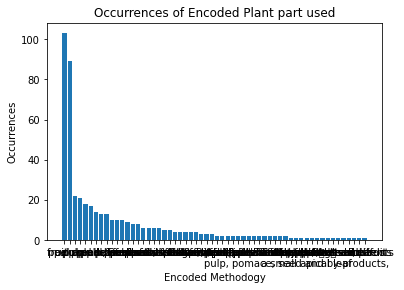

In [19]:
# Count the number of occurrences of each encoded label
counts = df["Plant part used"].value_counts()

# Plot the counts as a bar chart
fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_xlabel("Encoded Methodogy")
ax.set_ylabel("Occurrences")
ax.set_title("Occurrences of Encoded Plant part used")
plt.show()

In [20]:
df.head() 

,Serial Number,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,1,4,fruit pulp,Colombia,NaN,NaN,NaN,vacuum headspace method (VHS),ethanol,Passiflora edulis f. flavicarpa,Results showed that significant additions of t...,Â¢-phellandrene,"Vacuum headspace method (VHS), dynamic headspa...",NaN,NaN,NaN
1,2,4,seeds,Brazil,2.86,70.10,NaN,soxhlet method,methanol\r\n,Passiflora edulis,Results showed that INIAP 2009 and P10 showed ...,proanthocyanidins,NaN,NaN,NaN,
2,3,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",Spain.\r\n,NaN,NaN,NaN,NaN,methanol\r\n,"Passiflora edulis Sims F. flavicarpa,",The results ofDPPH are reported as 16 MTrolo...,NaN,NaN,165.42,NaN,49.71
3,4,9,fruit pulp,Brazil,24.87,23.87,0.31,soxhlet method,ethanol/water,PASSIFLORA EDULIS F. FLAVICARPA,Result shows under the conditions used in th...,proanthocyanidins,using the Folin-Ciocalteu reagent (FCR). ...,NaN,30.94,41.22
4,5,9,fruit pulp,Brazil,10.61,NaN,25.10,maceration method,NaN,PASSIFLORA EDULIS F. FLAVICARPA,The results showed that the passion fruit grow...,tocopherols,NaN,NaN,NaN,NaN


In [30]:
# create a dictionary to store the maximum TPC value for each solvent 
max_TPC = {}

# loop through the rows of the dataframe
for index, row in df.iterrows():
    # get the TPC value and solvent  for the current row
    TPC = row['TPC']
    solvent  = row['solvent system']
    
    # check if the solvent  is already in the dictionary
    if solvent  in max_TPC:
        # if it is, compare the current TPC value with the stored maximum value
        if float(TPC) >= max_TPC[solvent ]:
            # if the current TPC value is greater than or equal to the stored maximum value, update the maximum value
            max_TPC[solvent ] = float(TPC)
    else:
        # if the solvent  is not in the dictionary, add it with the current TPC value as the maximum value
        max_TPC[solvent ] = float(TPC)
# extract key-value pairs as list of tuples
tpc_tuples = max_TPC.items()

# create a list of dictionaries where each dictionary contains only the max TPC value for each solvent 
max_tpc_list = [{method: tpc} for method, tpc in tpc_tuples if tpc == max_TPC.get(method)]

print(max_tpc_list)




[{'methanol\r\n': 2.86}, {'ethanol/water': 24.87}, {nan: 570.74}, {'sodium carbonate': 710.0}, {' ': 210.11}, {'formic acid': 382.86}, {' hexane\r\n50%, ethanol 25%, acetone 25% (v/v/v), 0.1% of butylated hydroxytoluene (BHT) (p/v) and 5 g of calcium chloride (p/v).': 2.08}, {'\r\n': 86.6}, {'water': 384.44}, {'sodium phosphate': 361.73}, {'carboxymethyl cellulose': 398.6}, {'lactoglycerol': 41.49}, {'NaOH': 70.0}, {'hexane extract ': 499.3}, {'distilled water': 765.09}, {'water/tetrahydrofuran/trifluoracetic acid': 78.5}, {'methanolwaterHCl': 246.0}, {' ethanol': 3538.49}, {'calcium hypochlorite solution': 258.12}, {'methanol-water': 9.249}, {'MeOH': 397.25}, {'ethanol ': 92.62}, {'an alkaline solution\r\ncontaining bile (bovine bile, Sigma-Aldrich, 10) and pancreatin (from porcine pancreas, Sigma-Aldrich, 1) was added to increase the pH to 4.35.2.': 384.4}, {' water/formic acid ': 119.2}, {'ethanol in water': 55.237}, {'methanol/water': 63.5}, {'chlorinated water': 38.47}, {'formic a

In [31]:
max_TPC_list = []
for method_dict in max_tpc_list:
    max_TPC = 0
    for method, value in method_dict.items():
        if isinstance(value, float) and value >= max_TPC:
            max_TPC = value
    max_TPC_list.append(max_TPC)

solvents = ['methanol', 'ethanol/water', 'sodium carbonate', ' ', 'formic acid', 'hexane\r\%, ethanol %, acetone % (v/v/v), .% of butylated hydroxytoluene (BHT) (p/v) and  g of calcium chloride (p/v).', 'water', 'sodium phosphate', 'carboxymethyl cellulose', 'lactoglycerol', 'NaOH', 'hexane extract ', 'distilled water', 'water/tetrahydrofuran/trifluoracetic acid', 'methanolwaterHCl', 'ethanol', 'calcium hypochlorite solution', 'methanol-water', 'MeOH', 'ethanol ', 'an alkaline solution\r\ncontaining bile (bovine bile, Sigma-Aldrich, ) and pancreatin (from porcine pancreas, Sigma-Aldrich, ) was added to increase the pH to ...', 'water/formic acid ', 'ethanol in water', 'methanol/water', 'chlorinated water', 'formic acid ', 'DMSO', 'Dimethylsulfoxide', 'ethanol (EtOH)', 'NaOH', 'Buffered salts\r\nN.O (. g), N (. g), NaCl (. g) and MgS\r\n( g)', 'nhexane', 'hexane and water', 't-butano', 'DMSO ', 'ethanol:water', 'MethanolHexanehexane and water']

max_TPC_values = [max_TPC_list[i] for i in range(len(solvents))]
print(solvents)
print(max_TPC_values)


['methanol', 'ethanol/water', 'sodium carbonate', ' ', 'formic acid', 'hexane\r\\%, ethanol %, acetone % (v/v/v), .% of butylated hydroxytoluene (BHT) (p/v) and  g of calcium chloride (p/v).', 'water', 'sodium phosphate', 'carboxymethyl cellulose', 'lactoglycerol', 'NaOH', 'hexane extract ', 'distilled water', 'water/tetrahydrofuran/trifluoracetic acid', 'methanolwaterHCl', 'ethanol', 'calcium hypochlorite solution', 'methanol-water', 'MeOH', 'ethanol ', 'an alkaline solution\r\ncontaining bile (bovine bile, Sigma-Aldrich, ) and pancreatin (from porcine pancreas, Sigma-Aldrich, ) was added to increase the pH to ...', 'water/formic acid ', 'ethanol in water', 'methanol/water', 'chlorinated water', 'formic acid ', 'DMSO', 'Dimethylsulfoxide', 'ethanol (EtOH)', 'NaOH', 'Buffered salts\r\nN.O (. g), N (. g), NaCl (. g) and MgS\r\n( g)', 'nhexane', 'hexane and water', 't-butano', 'DMSO ', 'ethanol:water', 'MethanolHexanehexane and water']
[2.86, 24.87, 570.74, 710.0, 210.11, 382.86, 2.08, 8

In [26]:
solvent_groups = {'alcohol': [], 'acid': [], 'salt': [], 'water': []}

solvent_list = ['methanol', 'ethanol/water', 'sodium carbonate', ' ', 'formic acid', 'hexane\r\\%, ethanol %, acetone % (v/v/v), .% of butylated hydroxytoluene (BHT) (p/v) and  g of calcium chloride (p/v).', 'water', 'sodium phosphate', 'carboxymethyl cellulose', 'lactoglycerol', 'NaOH', 'hexane extract ', 'distilled water', 'water/tetrahydrofuran/trifluoracetic acid', 'methanolwaterHCl', 'ethanol', 'calcium hypochlorite solution', 'methanol-water', 'MeOH', 'ethanol ', 'an alkaline solution\r\ncontaining bile (bovine bile, Sigma-Aldrich, ) and pancreatin (from porcine pancreas, Sigma-Aldrich, ) was added to increase the pH to ...', 'water/formic acid ', 'ethanol in water', 'methanol/water', 'chlorinated water', 'formic acid ', 'DMSO', 'Dimethylsulfoxide', 'ethanol (EtOH)', 'NaOH', 'Buffered salts\r\nN.O (. g), N (. g), NaCl (. g) and MgS\r\n( g)', 'nhexane', 'hexane and water', 't-butano', 'DMSO ', 'ethanol:water', 'MethanolHexanehexane and water']

for solvent in solvent_list:
    if 'ethanol' in solvent or 'methanol' in solvent:
        solvent_groups['alcohol'].append(solvent)
    elif 'acid' in solvent:
        solvent_groups['acid'].append(solvent)
    elif 'sodium' in solvent or 'chloride' in solvent:
        solvent_groups['salt'].append(solvent)
    elif 'water' in solvent:
        solvent_groups['water'].append(solvent)

print(solvent_groups)

{'alcohol': ['methanol', 'ethanol/water', 'hexane\r\\%, ethanol %, acetone % (v/v/v), .% of butylated hydroxytoluene (BHT) (p/v) and  g of calcium chloride (p/v).', 'methanolwaterHCl', 'ethanol', 'methanol-water', 'ethanol ', 'ethanol in water', 'methanol/water', 'ethanol (EtOH)', 'ethanol:water', 'MethanolHexanehexane and water'], 'acid': ['formic acid', 'water/tetrahydrofuran/trifluoracetic acid', 'water/formic acid ', 'formic acid '], 'salt': ['sodium carbonate', 'sodium phosphate'], 'water': ['water', 'distilled water', 'chlorinated water', 'hexane and water']}


In [51]:

# group TPC values by solvent types
solvent_groups = {
    'alcohol': [],
    'acid': [],
    'salt': [],
    'water': []
}

for item in tpc_values:
    if 'ethanol' in item['solvent'] or 'methanol' in item['solvent'] :
        solvent_groups['alcohol'].append(item['tpc'])
    elif 'acid' in item['solvent']:
        solvent_groups['acid'].append(item['tpc'])
    elif 'sodium' in item['solvent'] or 'chloride' in item['solvent']:
        solvent_groups['salt'].append(item['tpc'])
    elif 'water' in item['solvent']:
        solvent_groups['water'].append(item['tpc'])

# calculate maximum TPC value for each solvent group
max_tpc_values = {}
for group, values in solvent_groups.items():
    max_tpc_values[group] = max(values)

print(max_tpc_values)

{'alcohol': 3538.49, 'acid': 382.86, 'salt': 710.0, 'water': 765.09}


In [56]:
# create a dictionary to store the maximum TFC value for each solvent 
max_TFC = {}

# loop through the rows of the dataframe
for index, row in df.iterrows():
    # get the TFC value and solvent  for the current row
    TFC = row['TFC']
    solvent  = row['solvent system']
    
    # check if the solvent  is already in the dictionary
    if solvent  in max_TFC:
        # if it is, compare the current TFC value with the stored maximum value
        if float(TFC) >= max_TFC[solvent ]:
            # if the current TFC value is greater than or equal to the stored maximum value, update the maximum value
            max_TFC[solvent ] = float(TFC)
    else:
        # if the solvent  is not in the dictionary, add it with the current TFC value as the maximum value
        max_TFC[solvent ] = float(TFC)
# extract key-value pairs as list of tuples
tfc_tuples = max_TFC.items()

# create a list of dictionaries where each dictionary contains only the max TFC value for each solvent 
max_tfc_list = [{method: tfc} for method, tfc in tfc_tuples if tfc == max_TFC.get(method)]

print(max_tfc_list)

[{'methanol\r\n': 70.1}, {'ethanol/water': 23.87}, {' hexane\r\n50%, ethanol 25%, acetone 25% (v/v/v), 0.1% of butylated hydroxytoluene (BHT) (p/v) and 5 g of calcium chloride (p/v).': 67.73}, {'\r\n': 121.48}, {'sodium phosphate': 8.364}, {'carboxymethyl cellulose': 10.4}, {'lactoglycerol': 467.19}, {'distilled water': 60.37}, {'water/tetrahydrofuran/trifluoracetic acid': 1.3}, {' methanol': 114.588}, {' water/formic acid ': 64.51}, {' methanolic ': 114.588}, {'petroleum ether': 2.1}, {'Buffered salts\r\nC6H5Na3O7.2H2O (0.5 g), C6H8Na2O8 (0.25 g), NaCl (0.5 g) and MgSO4\r\n(2 g)': 18.7}, {' hexane and water ': 16.6}, {'DMSO ': 5.12}, {'moderately': 2.1}, {' hexane and water': 16.6}, {'Ethanol': 68.22}]


In [39]:
max_tfc_values = []
if max_tfc_list:
    for method_dict in max_tfc_list:
        max_TFC = 0
        for method, value in method_dict.items():
            if isinstance(value, float) and value >= max_TFC:
                max_TFC = value
        max_tfc_values.append(max_TFC)

solvents = ['methanol', 'ethanol/water', 'sodium carbonate', ' ', 'formic acid', 'hexane\r\%, ethanol %, acetone % (v/v/v), .% of butylated hydroxytoluene (BHT) (p/v) and  g of calcium chloride (p/v).', 'water', 'sodium phosphate', 'carboxymethyl cellulose', 'lactoglycerol', 'NaOH', 'hexane extract ', 'distilled water', 'water/tetrahydrofuran/trifluoracetic acid', 'methanolwaterHCl', 'ethanol', 'calcium hypochlorite solution', 'methanol-water', 'MeOH', 'ethanol ', 'an alkaline solution\r\ncontaining bile (bovine bile, Sigma-Aldrich, ) and pancreatin (from porcine pancreas, Sigma-Aldrich, ) was added to increase the pH to ...', 'water/formic acid ', 'ethanol in water', 'methanol/water', 'chlorinated water', 'formic acid ', 'DMSO', 'Dimethylsulfoxide', 'ethanol (EtOH)', 'NaOH', 'Buffered salts\r\nN.O (. g), N (. g), NaCl (. g) and MgS\r\n( g)', 'nhexane', 'hexane and water', 't-butano', 'DMSO ', 'ethanol:water', 'MethanolHexanehexane and water']

max_TFC_values = [max_tfc_values[i] if i < len(max_tfc_values) else 0 for i in range(len(solvents))]
print(solvents)
print(max_TFC_values)

['methanol', 'ethanol/water', 'sodium carbonate', ' ', 'formic acid', 'hexane\r\\%, ethanol %, acetone % (v/v/v), .% of butylated hydroxytoluene (BHT) (p/v) and  g of calcium chloride (p/v).', 'water', 'sodium phosphate', 'carboxymethyl cellulose', 'lactoglycerol', 'NaOH', 'hexane extract ', 'distilled water', 'water/tetrahydrofuran/trifluoracetic acid', 'methanolwaterHCl', 'ethanol', 'calcium hypochlorite solution', 'methanol-water', 'MeOH', 'ethanol ', 'an alkaline solution\r\ncontaining bile (bovine bile, Sigma-Aldrich, ) and pancreatin (from porcine pancreas, Sigma-Aldrich, ) was added to increase the pH to ...', 'water/formic acid ', 'ethanol in water', 'methanol/water', 'chlorinated water', 'formic acid ', 'DMSO', 'Dimethylsulfoxide', 'ethanol (EtOH)', 'NaOH', 'Buffered salts\r\nN.O (. g), N (. g), NaCl (. g) and MgS\r\n( g)', 'nhexane', 'hexane and water', 't-butano', 'DMSO ', 'ethanol:water', 'MethanolHexanehexane and water']
[70.1, 23.87, 67.73, 121.48, 8.364, 10.4, 467.19, 60

In [40]:
tfc_list = [
    {'methanol\r\n': 70.1},
    {'ethanol/water': 23.87},
    {' hexane\r\n50%, ethanol 25%, acetone 25% (v/v/v), 0.1% of butylated hydroxytoluene (BHT) (p/v) and 5 g of calcium chloride (p/v).': 67.73},
    {'\r\n': 121.48},
    {'sodium phosphate': 8.364},
    {'carboxymethyl cellulose': 10.4},
    {'lactoglycerol': 467.19},
    {'distilled water': 60.37},
    {'water/tetrahydrofuran/trifluoracetic acid': 1.3},
    {' methanol': 114.588},
    {' water/formic acid ': 64.51},
    {' methanolic ': 114.588},
    {'petroleum ether': 2.1},
    {'Buffered salts\r\nC6H5Na3O7.2H2O (0.5 g), C6H8Na2O8 (0.25 g), NaCl (0.5 g) and MgSO4\r\n(2 g)': 18.7},
    {' hexane and water ': 16.6},
    {'DMSO ': 5.12},
    {'moderately': 2.1},
    {' hexane and water': 16.6},
    {'Ethanol': 68.22}
]

tfc_values = []

for solvent_dict in tfc_list:
    for solvent, value in solvent_dict.items():
        if isinstance(solvent, str):
            solvent = solvent.split('/')[0].strip()
            tfc_values.append({'solvent': solvent, 'tfc': value})

print(tfc_values)

[{'solvent': 'methanol', 'tfc': 70.1}, {'solvent': 'ethanol', 'tfc': 23.87}, {'solvent': 'hexane\r\n50%, ethanol 25%, acetone 25% (v', 'tfc': 67.73}, {'solvent': '', 'tfc': 121.48}, {'solvent': 'sodium phosphate', 'tfc': 8.364}, {'solvent': 'carboxymethyl cellulose', 'tfc': 10.4}, {'solvent': 'lactoglycerol', 'tfc': 467.19}, {'solvent': 'distilled water', 'tfc': 60.37}, {'solvent': 'water', 'tfc': 1.3}, {'solvent': 'methanol', 'tfc': 114.588}, {'solvent': 'water', 'tfc': 64.51}, {'solvent': 'methanolic', 'tfc': 114.588}, {'solvent': 'petroleum ether', 'tfc': 2.1}, {'solvent': 'Buffered salts\r\nC6H5Na3O7.2H2O (0.5 g), C6H8Na2O8 (0.25 g), NaCl (0.5 g) and MgSO4\r\n(2 g)', 'tfc': 18.7}, {'solvent': 'hexane and water', 'tfc': 16.6}, {'solvent': 'DMSO', 'tfc': 5.12}, {'solvent': 'moderately', 'tfc': 2.1}, {'solvent': 'hexane and water', 'tfc': 16.6}, {'solvent': 'Ethanol', 'tfc': 68.22}]


In [45]:
solvent_groups = {'alcohol': [], 'acid': [], 'salt': [], 'water': []}

solvent_list = ['methanol', 'ethanol/water', 'sodium carbonate', ' ', 'formic acid', 'hexane\r\\%, ethanol %, acetone % (v/v/v), .% of butylated hydroxytoluene (BHT) (p/v) and  g of calcium chloride (p/v).', 'water', 'sodium phosphate', 'carboxymethyl cellulose', 'lactoglycerol', 'NaOH', 'hexane extract ', 'distilled water', 'water/tetrahydrofuran/trifluoracetic acid', 'methanolwaterHCl', 'ethanol', 'calcium hypochlorite solution', 'methanol-water', 'MeOH', 'ethanol ', 'an alkaline solution\r\ncontaining bile (bovine bile, Sigma-Aldrich, ) and pancreatin (from porcine pancreas, Sigma-Aldrich, ) was added to increase the pH to ...', 'water/formic acid ', 'ethanol in water', 'methanol/water', 'chlorinated water', 'formic acid ', 'DMSO', 'Dimethylsulfoxide', 'ethanol (EtOH)', 'NaOH', 'Buffered salts\r\nN.O (. g), N (. g), NaCl (. g) and MgS\r\n( g)', 'nhexane', 'hexane and water', 't-butano', 'DMSO ', 'ethanol:water', 'MethanolHexanehexane and water']

for solvent in solvent_list:
    if 'ethanol' in solvent or 'methanol' in solvent:
        solvent_groups['alcohol'].append(solvent)
    elif 'acid' in solvent:
        solvent_groups['acid'].append(solvent)
    elif 'sodium' in solvent or 'chloride' in solvent:
        solvent_groups['salt'].append(solvent)
    elif 'water' in solvent:
        solvent_groups['water'].append(solvent)

print(solvent_groups)

{'alcohol': ['methanol', 'ethanol/water', 'hexane\r\\%, ethanol %, acetone % (v/v/v), .% of butylated hydroxytoluene (BHT) (p/v) and  g of calcium chloride (p/v).', 'methanolwaterHCl', 'ethanol', 'methanol-water', 'ethanol ', 'ethanol in water', 'methanol/water', 'ethanol (EtOH)', 'ethanol:water', 'MethanolHexanehexane and water'], 'acid': ['formic acid', 'water/tetrahydrofuran/trifluoracetic acid', 'water/formic acid ', 'formic acid '], 'salt': ['sodium carbonate', 'sodium phosphate'], 'water': ['water', 'distilled water', 'chlorinated water', 'hexane and water']}


In [47]:

# group TfC values by solvent types
solvent_groups = {
    'alcohol': [],
    'acid': [],
    'salt': [],
    'water': []
}

for item in tfc_values:
    if 'ethanol' in item['solvent'] or 'methanol' in item['solvent'] :
        solvent_groups['alcohol'].append(item['tfc'])
    elif 'acid' in item['solvent']:
        solvent_groups['acid'].append(item['tfc'])
    elif 'sodium' in item['solvent'] or 'chloride' in item['solvent']:
        solvent_groups['salt'].append(item['tfc'])
    elif 'water' in item['solvent']:
        solvent_groups['water'].append(item['tfc'])

# calculate maximum TfC value for each solvent group
max_tfc_values = {}
for group, values in solvent_groups.items():
    if values:
        max_tfc_values[group] = max(values)
    else:
        max_tfc_values[group] = 0

print(max_tfc_values)

{'alcohol': 114.588, 'acid': 0, 'salt': 8.364, 'water': 64.51}


In [58]:
# create a dictionary to store the maximum TCC value for each solvent 
max_TCC = {}

# loop through the rows of the dataframe
for index, row in df.iterrows():
    # get the TCC value and solvent  for the current row
    TCC = row['TCC']
    solvent  = row['solvent system']
    
    # check if the solvent  is already in the dictionary
    if solvent  in max_TCC:
        # if it is, compare the current TCC value with the stored maximum value
        if float(TCC) >= max_TCC[solvent ]:
            # if the current TCC value is greater than or equal to the stored maximum value, update the maximum value
            max_TCC[solvent ] = float(TCC)
    else:
        # if the solvent  is not in the dictionary, add it with the current TCC value as the maximum value
        max_TCC[solvent ] = float(TCC)
# extract key-value pairs as list of tuples
tcc_tuples = max_TCC.items()

# create a list of dictionaries where each dictionary contains only the max TCC value for each solvent 
max_tcc_list = [{method: tcc} for method, tcc in tcc_tuples if tcc == max_TCC.get(method)]

print(max_tcc_list)

[{'ethanol/water': 0.31}, {nan: 3829.22}, {' hexane\r\n50%, ethanol 25%, acetone 25% (v/v/v), 0.1% of butylated hydroxytoluene (BHT) (p/v) and 5 g of calcium chloride (p/v).': 6.07}, {'hexane': 0.094}, {'distilled water': 1362.07}, {'water/tetrahydrofuran/trifluoracetic acid': 35.2}, {'methanolwaterHCl': 2.5}, {'calcium hypochlorite solution': 13.26}, {'3-(4,5-dimethylthiazol-2-yl': 0.287}, {'ethanol in water': 23.064}, {'ethanol (EtOH)': 82.3}, {'Hexane': 586.7}]


In [59]:
max_tcc_values = []
if max_tcc_list:
    for method_dict in max_tcc_list:
        max_TCC = 0
        for method, value in method_dict.items():
            if isinstance(value, float) and value >= max_TCC:
                max_TCC = value
        max_tcc_values.append(max_TCC)

solvents = ['methanol', 'ethanol/water', 'sodium carbonate', ' ', 'formic acid', 'hexane\r\%, ethanol %, acetone % (v/v/v), .% of butylated hydroxytoluene (BHT) (p/v) and  g of calcium chloride (p/v).', 'water', 'sodium phosphate', 'carboxymethyl cellulose', 'lactoglycerol', 'NaOH', 'hexane extract ', 'distilled water', 'water/tetrahydrofuran/trifluoracetic acid', 'methanolwaterHCl', 'ethanol', 'calcium hypochlorite solution', 'methanol-water', 'MeOH', 'ethanol ', 'an alkaline solution\r\ncontaining bile (bovine bile, Sigma-Aldrich, ) and pancreatin (from porcine pancreas, Sigma-Aldrich, ) was added to increase the pH to ...', 'water/formic acid ', 'ethanol in water', 'methanol/water', 'chlorinated water', 'formic acid ', 'DMSO', 'Dimethylsulfoxide', 'ethanol (EtOH)', 'NaOH', 'Buffered salts\r\nN.O (. g), N (. g), NaCl (. g) and MgS\r\n( g)', 'nhexane', 'hexane and water', 't-butano', 'DMSO ', 'ethanol:water', 'MethanolHexanehexane and water']

max_TCC_values = [max_tcc_values[i] if i < len(max_tcc_values) else 0 for i in range(len(solvents))]
print(solvents)
print(max_TCC_values)

['methanol', 'ethanol/water', 'sodium carbonate', ' ', 'formic acid', 'hexane\r\\%, ethanol %, acetone % (v/v/v), .% of butylated hydroxytoluene (BHT) (p/v) and  g of calcium chloride (p/v).', 'water', 'sodium phosphate', 'carboxymethyl cellulose', 'lactoglycerol', 'NaOH', 'hexane extract ', 'distilled water', 'water/tetrahydrofuran/trifluoracetic acid', 'methanolwaterHCl', 'ethanol', 'calcium hypochlorite solution', 'methanol-water', 'MeOH', 'ethanol ', 'an alkaline solution\r\ncontaining bile (bovine bile, Sigma-Aldrich, ) and pancreatin (from porcine pancreas, Sigma-Aldrich, ) was added to increase the pH to ...', 'water/formic acid ', 'ethanol in water', 'methanol/water', 'chlorinated water', 'formic acid ', 'DMSO', 'Dimethylsulfoxide', 'ethanol (EtOH)', 'NaOH', 'Buffered salts\r\nN.O (. g), N (. g), NaCl (. g) and MgS\r\n( g)', 'nhexane', 'hexane and water', 't-butano', 'DMSO ', 'ethanol:water', 'MethanolHexanehexane and water']
[0.31, 3829.22, 6.07, 0.094, 1362.07, 35.2, 2.5, 13.

In [60]:
tcc_list = [{'ethanol/water': 0.31}, {'nan': 3829.22}, {' hexane\r\n50%, ethanol 25%, acetone 25% (v/v/v), 0.1% of butylated hydroxytoluene (BHT) (p/v) and 5 g of calcium chloride (p/v).': 6.07}, {'hexane': 0.094}, {'distilled water': 1362.07}, {'water/tetrahydrofuran/trifluoracetic acid': 35.2}, {'methanolwaterHCl': 2.5}, {'calcium hypochlorite solution': 13.26}, {'3-(4,5-dimethylthiazol-2-yl': 0.287}, {'ethanol in water': 23.064}, {'ethanol (EtOH)': 82.3}, {'Hexane': 586.7}]

tcc_values = []

for solvent_dict in tcc_list:
    for solvent, value in solvent_dict.items():
        if isinstance(solvent, str):
            solvent = solvent.split('/')[0].strip()
            tcc_values.append({'solvent': solvent, 'tcc': value})

print(tcc_values)

[{'solvent': 'ethanol', 'tcc': 0.31}, {'solvent': 'nan', 'tcc': 3829.22}, {'solvent': 'hexane\r\n50%, ethanol 25%, acetone 25% (v', 'tcc': 6.07}, {'solvent': 'hexane', 'tcc': 0.094}, {'solvent': 'distilled water', 'tcc': 1362.07}, {'solvent': 'water', 'tcc': 35.2}, {'solvent': 'methanolwaterHCl', 'tcc': 2.5}, {'solvent': 'calcium hypochlorite solution', 'tcc': 13.26}, {'solvent': '3-(4,5-dimethylthiazol-2-yl', 'tcc': 0.287}, {'solvent': 'ethanol in water', 'tcc': 23.064}, {'solvent': 'ethanol (EtOH)', 'tcc': 82.3}, {'solvent': 'Hexane', 'tcc': 586.7}]


In [61]:

solvent_groups = {'alcohol': [], 'acid': [], 'salt': [], 'water': []}

solvent_list = ['methanol', 'ethanol/water', 'sodium carbonate', ' ', 'formic acid', 'hexane\r\\%, ethanol %, acetone % (v/v/v), .% of butylated hydroxytoluene (BHT) (p/v) and  g of calcium chloride (p/v).', 'water', 'sodium phosphate', 'carboxymethyl cellulose', 'lactoglycerol', 'NaOH', 'hexane extract ', 'distilled water', 'water/tetrahydrofuran/trifluoracetic acid', 'methanolwaterHCl', 'ethanol', 'calcium hypochlorite solution', 'methanol-water', 'MeOH', 'ethanol ', 'an alkaline solution\r\ncontaining bile (bovine bile, Sigma-Aldrich, ) and pancreatin (from porcine pancreas, Sigma-Aldrich, ) was added to increase the pH to ...', 'water/formic acid ', 'ethanol in water', 'methanol/water', 'chlorinated water', 'formic acid ', 'DMSO', 'Dimethylsulfoxide', 'ethanol (EtOH)', 'NaOH', 'Buffered salts\r\nN.O (. g), N (. g), NaCl (. g) and MgS\r\n( g)', 'nhexane', 'hexane and water', 't-butano', 'DMSO ', 'ethanol:water', 'MethanolHexanehexane and water']

for solvent in solvent_list:
    if 'ethanol' in solvent or 'methanol' in solvent:
        solvent_groups['alcohol'].append(solvent)
    elif 'acid' in solvent:
        solvent_groups['acid'].append(solvent)
    elif 'sodium' in solvent or 'chloride' in solvent:
        solvent_groups['salt'].append(solvent)
    elif 'water' in solvent:
        solvent_groups['water'].append(solvent)

print(solvent_groups)

{'alcohol': ['methanol', 'ethanol/water', 'hexane\r\\%, ethanol %, acetone % (v/v/v), .% of butylated hydroxytoluene (BHT) (p/v) and  g of calcium chloride (p/v).', 'methanolwaterHCl', 'ethanol', 'methanol-water', 'ethanol ', 'ethanol in water', 'methanol/water', 'ethanol (EtOH)', 'ethanol:water', 'MethanolHexanehexane and water'], 'acid': ['formic acid', 'water/tetrahydrofuran/trifluoracetic acid', 'water/formic acid ', 'formic acid '], 'salt': ['sodium carbonate', 'sodium phosphate'], 'water': ['water', 'distilled water', 'chlorinated water', 'hexane and water']}


In [62]:

# group TCC values by solvent types
solvent_groups = {
    'alcohol': [],
    'acid': [],
    'salt': [],
    'water': []
}

for item in tcc_values:
    if 'ethanol' in item['solvent'] or 'methanol' in item['solvent'] :
        solvent_groups['alcohol'].append(item['tcc'])
    elif 'acid' in item['solvent']:
        solvent_groups['acid'].append(item['tcc'])
    elif 'sodium' in item['solvent'] or 'chloride' in item['solvent']:
        solvent_groups['salt'].append(item['tcc'])
    elif 'water' in item['solvent']:
        solvent_groups['water'].append(item['tcc'])

# calculate maximum TCC value for each solvent group
max_tcc_values = {}
for group, values in solvent_groups.items():
    if values:
        max_tcc_values[group] = max(values)
    else:
        max_tcc_values[group] = 0

print(max_tcc_values)

{'alcohol': 82.3, 'acid': 0, 'salt': 0, 'water': 1362.07}


In [24]:
df["place"].unique() 

array(['Colombia  ', 'Brazil', 'Spain.\r\n ', 'China', 'Nigeria',
       ' Brazil', 'Ecuador', 'Brazil and Ecuador', 'India', 'France.',
       'France ', 'Colombian', ' Japan ',
       'Caeine, theobromine, teofiline, (+)-catechin, (-)-epigalocathechin gallate, (-)-epicatechin,\r\n(-)-epicathechin gallate, (-)-epigallocatechin, cafeic acid, p-coumaric acid, vanillic acid, rosmarinic acid,\r\nquercetin, naringenin, luteolin, kaempferol, ursolic acid, pinocembrine, carnosic acid, apigenin, ferulic\r\nacid, cyanidin-3-rutinosede, pelargonidin-3-glucoside, cyanidin, pelargonidin, quercetine 3-glucoside,\r\nand kaempferol 3-glucoside were from Sigma Aldrich.',
       'Passion fruit (Passiflora edulis Sims) seeds were\r\npurchased from Guilin, Guangxi Province of China, in 2018, and\r\nidentified by Dr. Zheng-Hong Pan (Guangxi Institute of Botany,\r\nCAS). A voucher specimen (CTM2018-02) was deposited in the\r\nGuangxi Key Laboratory of Functional Phytochemicals Research and\r\nUtilization,

In [25]:
df["place"].value_counts() 

Brazil                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         137
India                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           71
China                             

In [26]:
df["place"] = label_encoder.fit_transform(df["place"])

In [27]:
df.head() 

,Serial Number,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,1,4,fruit pulp,21,NaN,NaN,NaN,vacuum headspace method (VHS),ethanol,Passiflora edulis f. flavicarpa,Results showed that significant additions of t...,Â¢-phellandrene,"Vacuum headspace method (VHS), dynamic headspa...",NaN,NaN,NaN
1,2,4,seeds,9,2.86,70.10,NaN,soxhlet method,methanol\r\n,Passiflora edulis,Results showed that INIAP 2009 and P10 showed ...,proanthocyanidins,NaN,NaN,NaN,
2,3,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",51,NaN,NaN,NaN,NaN,methanol\r\n,"Passiflora edulis Sims F. flavicarpa,",The results ofDPPH are reported as 16 MTrolo...,NaN,NaN,165.42,NaN,49.71
3,4,9,fruit pulp,9,24.87,23.87,0.31,soxhlet method,ethanol/water,PASSIFLORA EDULIS F. FLAVICARPA,Result shows under the conditions used in th...,proanthocyanidins,using the Folin-Ciocalteu reagent (FCR). ...,NaN,30.94,41.22
4,5,9,fruit pulp,9,10.61,NaN,25.10,maceration method,NaN,PASSIFLORA EDULIS F. FLAVICARPA,The results showed that the passion fruit grow...,tocopherols,NaN,NaN,NaN,NaN


In [28]:
df["Methodogy"].unique() 

array(['vacuum headspace method (VHS)', 'soxhlet  method', nan,
       'maceration method', 'superficial method',
       'transect census method', 'percolation method', 'Soxhlet  method',
       'digestion method',
       'methanol:water containing 40% methanol:water (v/v).', 'water',
       'Supercritical Fluid Extraction', ' maceration method',
       'solid-liquid extraction', 'aqueous extract',
       ' quadrant inter section method', 'Soxhlet method',
       'solid-phase extraction', 'Soxhlet extraction',
       'supercritical fluid extraction', 'hydroethanolic extract ',
       'Ultrasonic method', ' aqueous extraction ', 'crude extract',
       'waveultrasound extraction ', 'QuEChERS extractio',
       'Methanolic extract', 'Supercritical fluid extraction',
       'QuEChERS extraction'], dtype=object)

In [29]:
df["Methodogy"].value_counts()

Soxhlet  method                                        212
superficial method                                      34
Supercritical Fluid Extraction                          26
Soxhlet method                                          23
maceration method                                       20
 aqueous extraction                                     14
 maceration method                                       7
digestion method                                         6
QuEChERS extractio                                       6
Ultrasonic method                                        5
solid-liquid extraction                                  4
aqueous extract                                          4
Soxhlet extraction                                       4
water                                                    3
Methanolic extract                                       2
crude extract                                            2
soxhlet  method                                         

In [30]:
df["Methodogy"] = label_encoder.fit_transform(df["Methodogy"])

In [31]:
df.head(20) 

,Serial Number,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,1,4,fruit pulp,21,NaN,NaN,NaN,25,ethanol,Passiflora edulis f. flavicarpa,Results showed that significant additions of t...,Â¢-phellandrene,"Vacuum headspace method (VHS), dynamic headspa...",NaN,NaN,NaN
1,2,4,seeds,9,2.86,70.10,NaN,21,methanol\r\n,Passiflora edulis,Results showed that INIAP 2009 and P10 showed ...,proanthocyanidins,NaN,NaN,NaN,
2,3,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",51,NaN,NaN,NaN,28,methanol\r\n,"Passiflora edulis Sims F. flavicarpa,",The results ofDPPH are reported as 16 MTrolo...,NaN,NaN,165.42,NaN,49.71
3,4,9,fruit pulp,9,24.87,23.87,0.31,21,ethanol/water,PASSIFLORA EDULIS F. FLAVICARPA,Result shows under the conditions used in th...,proanthocyanidins,using the Folin-Ciocalteu reagent (FCR). ...,NaN,30.94,41.22
4,5,9,fruit pulp,9,10.61,NaN,25.10,16,NaN,PASSIFLORA EDULIS F. FLAVICARPA,The results showed that the passion fruit grow...,tocopherols,NaN,NaN,NaN,NaN
5,6,9,fruits,9,20.10,21.67,NaN,23,ethanol,PASSIFLORA EDULIS F. FLAVICARPA,According to the analysis of variance (data no...,ascorbic acid,The determination of DPPH antioxidant activity...,NaN,NaN,36.45
6,7,9,fruits,18,NaN,158.00,NaN,16,ethanol,PASSIFLORA EDULIS F. FLAVICARPA,"Various extracts, fruit juice and isolated co...","quercetine, luteolin",NaN,NaN,NaN,NaN
7,8,9,seeds,9,710.00,NaN,NaN,16,sodium carbonate,PASSIFLORA EDULIS F. FLAVICARPA,result showsLeaves of P. edulis plants in juve...,ascorbic acid,The extracts were prepared by adding to intact...,NaN,NaN,56.33
8,9,9,fruits,42,29.60,0.80,NaN,16,NaN,PASSIFLORA EDULIS F. FLAVICARPA,"The results of proximate composition of juice,...",ascorbic acid,Fifty grams (50g) of each sample were soaked i...,NaN,NaN,NaN
9,10,4,flowers,1,NaN,NaN,NaN,24,NaN,Passiflora edulis,a significant increase in pollinator density ...,a-tocopherol and D-atocotrienol,NaN,NaN,NaN,36.45


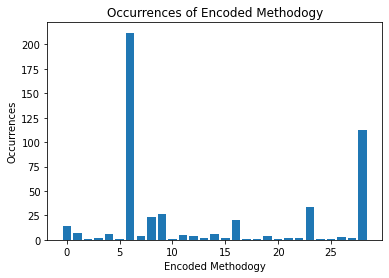

In [32]:
# Count the number of occurrences of each encoded label
counts = df["Methodogy"].value_counts()

# Plot the counts as a bar chart
fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_xlabel("Encoded Methodogy")
ax.set_ylabel("Occurrences")
ax.set_title("Occurrences of Encoded Methodogy")
plt.show() 

In [33]:
df["result"].value_counts

<bound method IndexOpsMixin.value_counts of 0      Results showed that significant additions of t...
1      Results showed that INIAP 2009 and P10 showed ...
2      The results ofDPPH are reported as 16 MTrolo...
3      Result shows   under the conditions used in th...
4      The results showed that the passion fruit grow...
                             ...                        
495    results support the ethnopharmacological use o...
496    The content of flavonoid components measured i...
497    The content of flavonoid components measured i...
498    The content of flavonoid components measured i...
499    The developed method allowed the accurate dete...
Name: result, Length: 500, dtype: object>

In [34]:
df["result"] = label_encoder.fit_transform(df["result"])

In [35]:
df.head() 

,Serial Number,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,1,4,fruit pulp,21,NaN,NaN,NaN,25,ethanol,Passiflora edulis f. flavicarpa,60,Â¢-phellandrene,"Vacuum headspace method (VHS), dynamic headspa...",NaN,NaN,NaN
1,2,4,seeds,9,2.86,70.10,NaN,21,methanol\r\n,Passiflora edulis,58,proanthocyanidins,NaN,NaN,NaN,
2,3,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",51,NaN,NaN,NaN,28,methanol\r\n,"Passiflora edulis Sims F. flavicarpa,",122,NaN,NaN,165.42,NaN,49.71
3,4,9,fruit pulp,9,24.87,23.87,0.31,21,ethanol/water,PASSIFLORA EDULIS F. FLAVICARPA,54,proanthocyanidins,using the Folin-Ciocalteu reagent (FCR). ...,NaN,30.94,41.22
4,5,9,fruit pulp,9,10.61,NaN,25.10,16,NaN,PASSIFLORA EDULIS F. FLAVICARPA,132,tocopherols,NaN,NaN,NaN,NaN


In [36]:
df["mislenious"].value_counts

<bound method IndexOpsMixin.value_counts of 0        Â¢-phellandrene
1      proanthocyanidins
2                    NaN
3      proanthocyanidins
4            tocopherols
             ...        
495                  NaN
496                  NaN
497                  NaN
498                  NaN
499                  NaN
Name: mislenious, Length: 500, dtype: object>

In [37]:
df["mislenious"] = label_encoder.fit_transform(df["mislenious"])

In [38]:
df.head() 

,Serial Number,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,1,4,fruit pulp,21,NaN,NaN,NaN,25,ethanol,Passiflora edulis f. flavicarpa,60,30,"Vacuum headspace method (VHS), dynamic headspa...",NaN,NaN,NaN
1,2,4,seeds,9,2.86,70.10,NaN,21,methanol\r\n,Passiflora edulis,58,21,NaN,NaN,NaN,
2,3,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",51,NaN,NaN,NaN,28,methanol\r\n,"Passiflora edulis Sims F. flavicarpa,",122,31,NaN,165.42,NaN,49.71
3,4,9,fruit pulp,9,24.87,23.87,0.31,21,ethanol/water,PASSIFLORA EDULIS F. FLAVICARPA,54,21,using the Folin-Ciocalteu reagent (FCR). ...,NaN,30.94,41.22
4,5,9,fruit pulp,9,10.61,NaN,25.10,16,NaN,PASSIFLORA EDULIS F. FLAVICARPA,132,27,NaN,NaN,NaN,NaN


In [39]:
df["Exatraction technique"].value_counts

<bound method IndexOpsMixin.value_counts of 0      Vacuum headspace method (VHS), dynamic headspa...
1                                                    NaN
2                                                    NaN
3      using  the  Folin-Ciocalteu  reagent  (FCR).  ...
4                                                    NaN
                             ...                        
495    The dried material was extracted with ethanol ...
496                                                  NaN
497                                                  NaN
498                                                  NaN
499    The validated extraction procedure involved we...
Name: Exatraction technique, Length: 500, dtype: object>

In [40]:
df["Exatraction technique"] = label_encoder.fit_transform(df["Exatraction technique"])

In [41]:
df.head() 

,Serial Number,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,1,4,fruit pulp,21,NaN,NaN,NaN,25,ethanol,Passiflora edulis f. flavicarpa,60,30,106,NaN,NaN,NaN
1,2,4,seeds,9,2.86,70.10,NaN,21,methanol\r\n,Passiflora edulis,58,21,122,NaN,NaN,
2,3,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",51,NaN,NaN,NaN,28,methanol\r\n,"Passiflora edulis Sims F. flavicarpa,",122,31,122,165.42,NaN,49.71
3,4,9,fruit pulp,9,24.87,23.87,0.31,21,ethanol/water,PASSIFLORA EDULIS F. FLAVICARPA,54,21,121,NaN,30.94,41.22
4,5,9,fruit pulp,9,10.61,NaN,25.10,16,NaN,PASSIFLORA EDULIS F. FLAVICARPA,132,27,122,NaN,NaN,NaN


In [42]:
df["FRAP"].value_counts

<bound method IndexOpsMixin.value_counts of 0         NaN
1         NaN
2      165.42
3         NaN
4         NaN
        ...  
495     312.4
496       NaN
497       NaN
498       NaN
499       NaN
Name: FRAP, Length: 500, dtype: object>

In [43]:
df["FRAP"] = label_encoder.fit_transform(df["FRAP"])

In [44]:
df.head() 

,Serial Number,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,1,4,fruit pulp,21,NaN,NaN,NaN,25,ethanol,Passiflora edulis f. flavicarpa,60,30,106,21,NaN,NaN
1,2,4,seeds,9,2.86,70.10,NaN,21,methanol\r\n,Passiflora edulis,58,21,122,21,NaN,
2,3,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",51,NaN,NaN,NaN,28,methanol\r\n,"Passiflora edulis Sims F. flavicarpa,",122,31,122,6,NaN,49.71
3,4,9,fruit pulp,9,24.87,23.87,0.31,21,ethanol/water,PASSIFLORA EDULIS F. FLAVICARPA,54,21,121,21,30.94,41.22
4,5,9,fruit pulp,9,10.61,NaN,25.10,16,NaN,PASSIFLORA EDULIS F. FLAVICARPA,132,27,122,21,NaN,NaN


In [45]:
df["ABTS"] = label_encoder.fit_transform(df["ABTS"])

In [46]:
df.head() 

,Serial Number,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,1,4,fruit pulp,21,NaN,NaN,NaN,25,ethanol,Passiflora edulis f. flavicarpa,60,30,106,21,22,NaN
1,2,4,seeds,9,2.86,70.10,NaN,21,methanol\r\n,Passiflora edulis,58,21,122,21,22,
2,3,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",51,NaN,NaN,NaN,28,methanol\r\n,"Passiflora edulis Sims F. flavicarpa,",122,31,122,6,22,49.71
3,4,9,fruit pulp,9,24.87,23.87,0.31,21,ethanol/water,PASSIFLORA EDULIS F. FLAVICARPA,54,21,121,21,5,41.22
4,5,9,fruit pulp,9,10.61,NaN,25.10,16,NaN,PASSIFLORA EDULIS F. FLAVICARPA,132,27,122,21,22,NaN


In [47]:
df["DPPH"] = label_encoder.fit_transform(df["DPPH"])

In [48]:
df.head(10) 

,Serial Number,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,1,4,fruit pulp,21,NaN,NaN,NaN,25,ethanol,Passiflora edulis f. flavicarpa,60,30,106,21,22,53
1,2,4,seeds,9,2.86,70.10,NaN,21,methanol\r\n,Passiflora edulis,58,21,122,21,22,0
2,3,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",51,NaN,NaN,NaN,28,methanol\r\n,"Passiflora edulis Sims F. flavicarpa,",122,31,122,6,22,29
3,4,9,fruit pulp,9,24.87,23.87,0.31,21,ethanol/water,PASSIFLORA EDULIS F. FLAVICARPA,54,21,121,21,5,21
4,5,9,fruit pulp,9,10.61,NaN,25.10,16,NaN,PASSIFLORA EDULIS F. FLAVICARPA,132,27,122,21,22,53
5,6,9,fruits,9,20.10,21.67,NaN,23,ethanol,PASSIFLORA EDULIS F. FLAVICARPA,19,13,60,21,22,17
6,7,9,fruits,18,NaN,158.00,NaN,16,ethanol,PASSIFLORA EDULIS F. FLAVICARPA,8,23,122,21,22,53
7,8,9,seeds,9,710.00,NaN,NaN,16,sodium carbonate,PASSIFLORA EDULIS F. FLAVICARPA,174,12,67,21,22,35
8,9,9,fruits,42,29.60,0.80,NaN,16,NaN,PASSIFLORA EDULIS F. FLAVICARPA,119,12,23,21,22,53
9,10,4,flowers,1,NaN,NaN,NaN,24,NaN,Passiflora edulis,9,11,122,21,22,17


In [49]:
df.head() 

,Serial Number,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,1,4,fruit pulp,21,NaN,NaN,NaN,25,ethanol,Passiflora edulis f. flavicarpa,60,30,106,21,22,53
1,2,4,seeds,9,2.86,70.10,NaN,21,methanol\r\n,Passiflora edulis,58,21,122,21,22,0
2,3,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",51,NaN,NaN,NaN,28,methanol\r\n,"Passiflora edulis Sims F. flavicarpa,",122,31,122,6,22,29
3,4,9,fruit pulp,9,24.87,23.87,0.31,21,ethanol/water,PASSIFLORA EDULIS F. FLAVICARPA,54,21,121,21,5,21
4,5,9,fruit pulp,9,10.61,NaN,25.10,16,NaN,PASSIFLORA EDULIS F. FLAVICARPA,132,27,122,21,22,53


In [50]:
df["solvent system"].value_counts

<bound method IndexOpsMixin.value_counts of 0            ethanol
1       methanol\r\n
2       methanol\r\n
3      ethanol/water
4                NaN
           ...      
495          ethanol
496          ethanol
497          ethanol
498          ethanol
499              NaN
Name: solvent system, Length: 500, dtype: object>

In [51]:
df["solvent system"] = label_encoder.fit_transform(df["solvent system"])

In [52]:
df.head() 

,Serial Number,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,1,4,fruit pulp,21,NaN,NaN,NaN,25,35,Passiflora edulis f. flavicarpa,60,30,106,21,22,53
1,2,4,seeds,9,2.86,70.10,NaN,21,49,Passiflora edulis,58,21,122,21,22,0
2,3,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",51,NaN,NaN,NaN,28,49,"Passiflora edulis Sims F. flavicarpa,",122,31,122,6,22,29
3,4,9,fruit pulp,9,24.87,23.87,0.31,21,39,PASSIFLORA EDULIS F. FLAVICARPA,54,21,121,21,5,21
4,5,9,fruit pulp,9,10.61,NaN,25.10,16,67,PASSIFLORA EDULIS F. FLAVICARPA,132,27,122,21,22,53


In [53]:
df["scienctific name"] = label_encoder.fit_transform(df["scienctific name"])

In [54]:
df.head() 

,Serial Number,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,1,4,fruit pulp,21,NaN,NaN,NaN,25,35,46,60,30,106,21,22,53
1,2,4,seeds,9,2.86,70.10,NaN,21,49,30,58,21,122,21,22,0
2,3,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",51,NaN,NaN,NaN,28,49,38,122,31,122,6,22,29
3,4,9,fruit pulp,9,24.87,23.87,0.31,21,39,21,54,21,121,21,5,21
4,5,9,fruit pulp,9,10.61,NaN,25.10,16,67,21,132,27,122,21,22,53


In [55]:
df.describe() 

,Serial Number,Species,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
count,500.000000,500.000000,500.000000,298.000000,148.000000,105.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,7.128000,25.426000,296.482940,105.753196,210.504305,13.302000,45.336000,38.636000,107.662000,24.706000,83.84600,19.698000,20.754000,46.930000
std,144.481833,6.390406,16.826252,658.588109,155.430447,463.763249,9.626012,19.300989,19.134884,65.952553,9.883265,41.77819,4.213586,4.247065,12.716782
min,1.000000,0.000000,0.000000,0.015000,0.150000,0.094000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,125.750000,0.000000,9.000000,19.950000,11.410000,6.070000,6.000000,35.000000,30.000000,49.000000,22.000000,46.00000,21.000000,22.000000,53.000000
50%,250.500000,9.000000,20.000000,86.000000,45.600000,35.200000,8.000000,43.000000,30.000000,98.000000,31.000000,101.00000,21.000000,22.000000,53.000000
75%,375.250000,13.000000,36.000000,275.895000,114.588000,82.300000,23.000000,67.000000,53.000000,173.000000,31.000000,122.00000,21.000000,22.000000,53.000000
max,500.000000,15.000000,58.000000,3538.490000,741.530000,3829.220000,28.000000,67.000000,83.000000,202.000000,31.000000,122.00000,21.000000,22.000000,53.000000


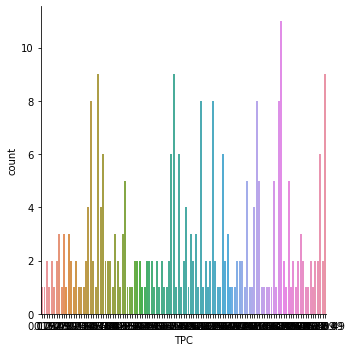

In [56]:
sns.catplot(x="TPC",data=df,kind="count")

In [57]:
df.head(5) 

,Serial Number,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,1,4,fruit pulp,21,NaN,NaN,NaN,25,35,46,60,30,106,21,22,53
1,2,4,seeds,9,2.86,70.10,NaN,21,49,30,58,21,122,21,22,0
2,3,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",51,NaN,NaN,NaN,28,49,38,122,31,122,6,22,29
3,4,9,fruit pulp,9,24.87,23.87,0.31,21,39,21,54,21,121,21,5,21
4,5,9,fruit pulp,9,10.61,NaN,25.10,16,67,21,132,27,122,21,22,53


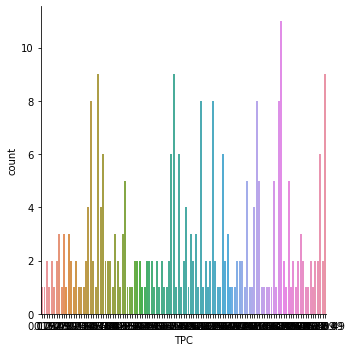

In [58]:
sns.catplot(x="TPC",data=df,kind="count")

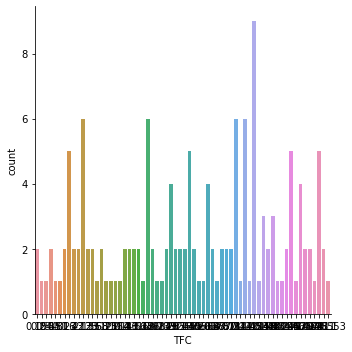

In [59]:
sns.catplot(x="TFC",data=df,kind="count")

<AxesSubplot:xlabel='TPC', ylabel='Methodogy'>

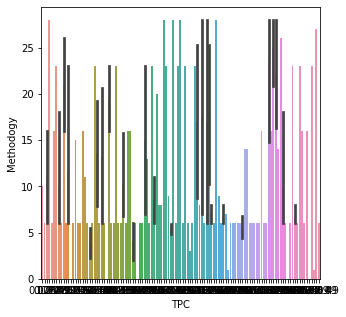

In [60]:
plot = plt.figure(figsize=(5,5)) 
sns.barplot(x="TPC",y="Methodogy",data=df) 

<AxesSubplot:xlabel='TPC', ylabel='solvent system'>

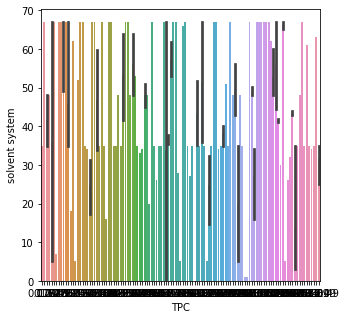

In [61]:
plot = plt.figure(figsize=(5,5)) 
sns.barplot(x="TPC",y="solvent system",data=df)

<AxesSubplot:xlabel='TPC', ylabel='Exatraction technique'>

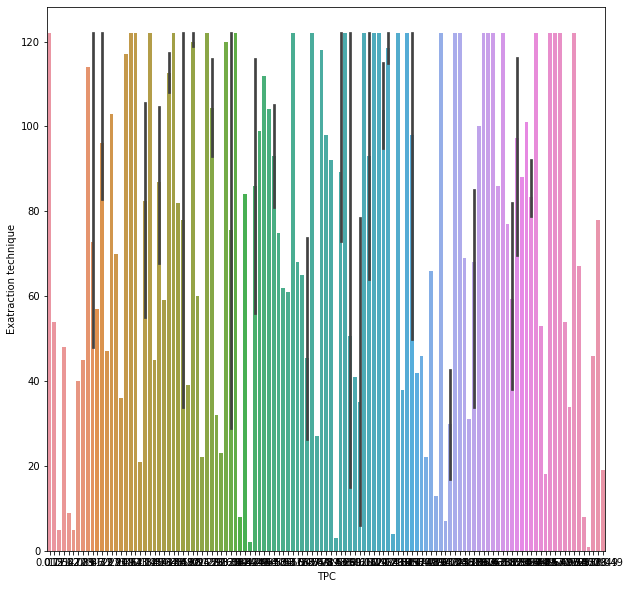

In [62]:
plot = plt.figure(figsize=(10,10)) 
sns.barplot(x="TPC",y="Exatraction technique",data=df)

In [63]:

# Remove unwanted columns
df = df.drop(["Serial Number"],  axis=1)

# Calculate the correlation coefficients
corr_matrix = df[["TPC", "TFC", "TCC"]].corr()

correlation = df.corr() 

In [64]:
df.corr()

,Species,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
Species,1.000000,0.079614,-0.162149,-0.237243,-0.012717,-0.072529,0.188969,0.033585,-0.020562,-0.243375,-0.051426,-0.086160,-0.163719,0.024524
place,0.079614,1.000000,-0.096179,0.196456,0.122411,0.157253,0.084899,0.002642,0.140955,0.133469,0.115658,0.110783,-0.005794,0.071009
TPC,-0.162149,-0.096179,1.000000,0.403174,0.323867,-0.057435,-0.088841,-0.196243,0.213404,0.138409,-0.219659,-0.421190,0.069972,-0.058648
TFC,-0.237243,0.196456,0.403174,1.000000,0.000726,0.060411,0.124286,-0.182672,-0.115879,-0.009528,0.282949,0.130579,0.055881,-0.218380
TCC,-0.012717,0.122411,0.323867,0.000726,1.000000,0.129446,0.067747,-0.183444,0.009692,-0.197749,0.109356,0.140558,0.153545,0.232208
Methodogy,-0.072529,0.157253,-0.057435,0.060411,0.129446,1.000000,0.348541,-0.003874,0.215329,-0.008375,0.261447,0.138176,0.175201,0.009783
solvent system,0.188969,0.084899,-0.088841,0.124286,0.067747,0.348541,1.000000,0.029986,0.121193,-0.147799,0.182444,-0.031227,0.001450,-0.032392
scienctific name,0.033585,0.002642,-0.196243,-0.182672,-0.183444,-0.003874,0.029986,1.000000,-0.109328,0.161267,0.038422,0.075189,0.025997,0.069445
result,-0.020562,0.140955,0.213404,-0.115879,0.009692,0.215329,0.121193,-0.109328,1.000000,0.185947,0.205044,-0.042922,0.105825,0.147523
mislenious,-0.243375,0.133469,0.138409,-0.009528,-0.197749,-0.008375,-0.147799,0.161267,0.185947,1.000000,0.047934,-0.053964,0.086598,0.162920


<AxesSubplot:>

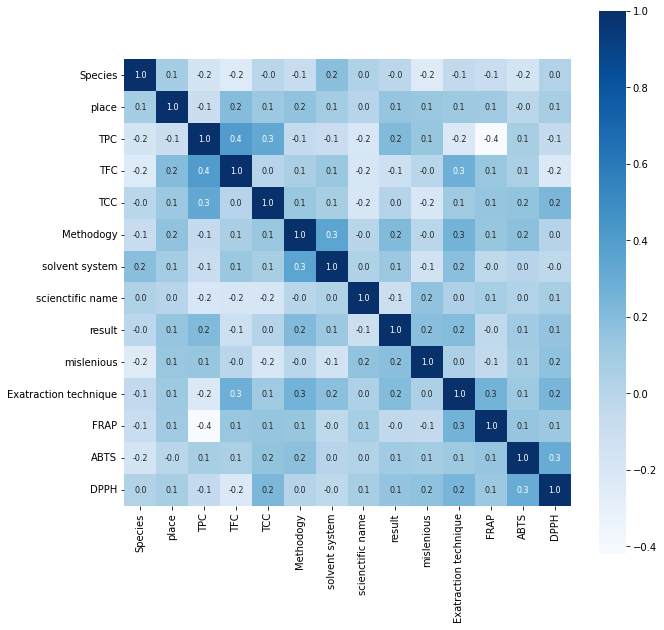

In [65]:
plt.figure(figsize=(10,10)) 
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="Blues") 

In [66]:
X = df.drop("TPC",axis=1) 

In [67]:
print(X) 

     Species                                    Plant part used  place    TFC  \
0          4                                         fruit pulp     21    NaN   
1          4                                              seeds      9  70.10   
2          8  fruit, peel,\r\npulp, pomace, seed and by-prod...     51    NaN   
3          9                                         fruit pulp      9  23.87   
4          9                                         fruit pulp      9    NaN   
..       ...                                                ...    ...    ...   
495        0                                               pulp     20    NaN   
496        0                                               pulp     18    NaN   
497        0                                               pulp     18    NaN   
498        0                                               pulp     18    NaN   
499       14                                     pulp and seeds     55    NaN   

       TCC  Methodogy  solv

<AxesSubplot:xlabel='TPC', ylabel='Count'>

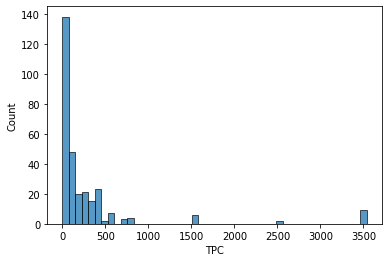

In [68]:
sns.histplot(df['TPC'])

Species                      AxesSubplot(0.125,0.71587;0.168478x0.16413)
place                     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
TPC                       AxesSubplot(0.529348,0.71587;0.168478x0.16413)
TFC                       AxesSubplot(0.731522,0.71587;0.168478x0.16413)
TCC                         AxesSubplot(0.125,0.518913;0.168478x0.16413)
Methodogy                AxesSubplot(0.327174,0.518913;0.168478x0.16413)
solvent system           AxesSubplot(0.529348,0.518913;0.168478x0.16413)
scienctific name         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
result                      AxesSubplot(0.125,0.321957;0.168478x0.16413)
mislenious               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Exatraction technique    AxesSubplot(0.529348,0.321957;0.168478x0.16413)
FRAP                     AxesSubplot(0.731522,0.321957;0.168478x0.16413)
ABTS                           AxesSubplot(0.125,0.125;0.168478x0.16413)
DPPH                        AxesSubplot(0.327174,0.

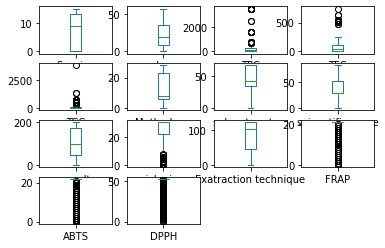

In [69]:
df.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

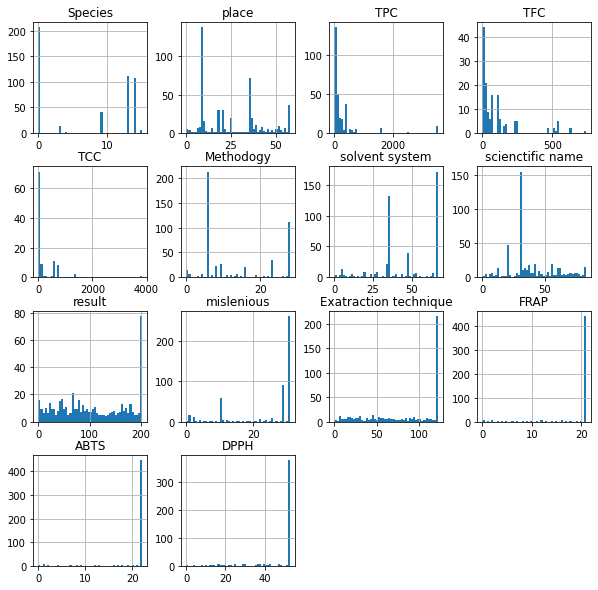

In [70]:
df.hist(figsize=(10,10),bins=50)
plt.show()

In [71]:

label_encoder = LabelEncoder()
df["solvent system"] = label_encoder.fit_transform(df["solvent system"])
df.head()


,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,4,fruit pulp,21,NaN,NaN,NaN,25,35,46,60,30,106,21,22,53
1,4,seeds,9,2.86,70.10,NaN,21,49,30,58,21,122,21,22,0
2,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",51,NaN,NaN,NaN,28,49,38,122,31,122,6,22,29
3,9,fruit pulp,9,24.87,23.87,0.31,21,39,21,54,21,121,21,5,21
4,9,fruit pulp,9,10.61,NaN,25.10,16,67,21,132,27,122,21,22,53


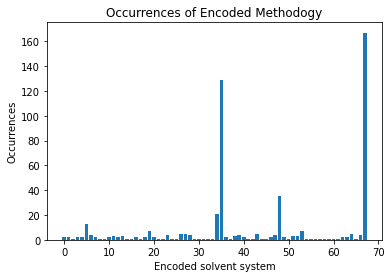

In [72]:
# Count the number of occurrences of each encoded label
counts = df["solvent system"].value_counts()

# Plot the counts as a bar chart
fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_xlabel("Encoded solvent system")
ax.set_ylabel("Occurrences")
ax.set_title("Occurrences of Encoded Methodogy")
plt.show()

In [73]:
# Count the number of occurrences of each encoded label
counts = df["solvent system"].value_counts()
print(counts)


67    167
35    129
48     35
34     21
5      13
     ... 
59      1
30      1
14      1
58      1
24      1
Name: solvent system, Length: 68, dtype: int64


In [74]:
df.head(30)

,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,4,fruit pulp,21,NaN,NaN,NaN,25,35,46,60,30,106,21,22,53
1,4,seeds,9,2.86,70.10,NaN,21,49,30,58,21,122,21,22,0
2,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",51,NaN,NaN,NaN,28,49,38,122,31,122,6,22,29
3,9,fruit pulp,9,24.87,23.87,0.31,21,39,21,54,21,121,21,5,21
4,9,fruit pulp,9,10.61,NaN,25.10,16,67,21,132,27,122,21,22,53
5,9,fruits,9,20.10,21.67,NaN,23,35,21,19,13,60,21,22,17
6,9,fruits,18,NaN,158.00,NaN,16,35,21,8,23,122,21,22,53
7,9,seeds,9,710.00,NaN,NaN,16,61,21,174,12,67,21,22,35
8,9,fruits,42,29.60,0.80,NaN,16,67,21,119,12,23,21,22,53
9,4,flowers,1,NaN,NaN,NaN,24,67,30,9,11,122,21,22,17


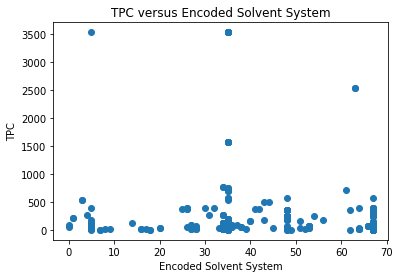

In [75]:
# Create a scatter plot of TPC versus encoded solvent system
fig, ax = plt.subplots()
ax.scatter(df["solvent system"], df["TPC"])
ax.set_xlabel("Encoded Solvent System")
ax.set_ylabel("TPC")
ax.set_title("TPC versus Encoded Solvent System")
plt.show()


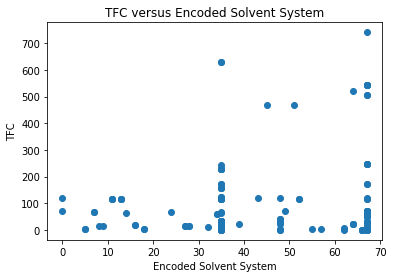

In [76]:
# Create a scatter plot of TPC versus encoded solvent system
fig, ax = plt.subplots()
ax.scatter(df["solvent system"], df["TFC"])
ax.set_xlabel("Encoded Solvent System")
ax.set_ylabel("TFC")
ax.set_title("TFC versus Encoded Solvent System")
plt.show()



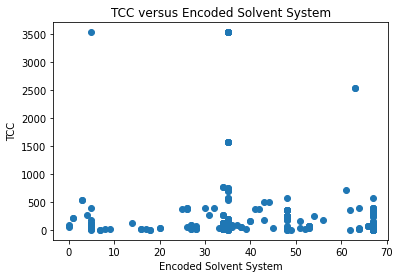

In [77]:
# Create a scatter plot of TPC versus encoded solvent system
fig, ax = plt.subplots()
ax.scatter(df["solvent system"], df["TPC"])
ax.set_xlabel("Encoded Solvent System")
ax.set_ylabel("TCC")
ax.set_title("TCC versus Encoded Solvent System")
plt.show()


In [78]:
label_encoder = LabelEncoder()

# fit and transform the "solvent system" column
encoded_solvent_system = label_encoder.fit_transform(df["solvent system"])

# print the encoded values
print(encoded_solvent_system)



[35 49 49 39 67 35 35 61 67 67 67 67 35 48 46  1 41  7 21 67 67 67 12 12
 65  4 67 50 67  2 67 35  0 64 67 67 67 48 67 62 67 67 48 67 62 67 67 67
 48 67 67 67 67 67 67 67 67 48 67 67 67 67 48 67 48 48 67 67 67 32 45 43
 67 28 44 67 67 67 34 67 67 67 34 67 67 67 67 34 67 67 67 67 35 48  6 67
  6 67 34  4 47 66 35 67 48 54 35 67 67 35 67 48 11 19 35 35 67 35 67 67
 23  5 35 67 67 31  5 48 64 48 60 29 52 67  5 48 67 26 67 26 51 59 51 36
 51 67 19 35 67 26 67 67 35 30 35 67 35 14 58  5 67 28 67 15 48 43  0 67
 67 34 67 67 67 34 67 67 67 67 34 67 67 67 67 35 48  6 67 43 67 34 34 47
 66 38 67 53 48 35 67 67 39 67 48 13 19 35 35 67 35 67 67 23  5 35 67 67
 34 34 33 35 35 35 46  1 42  7 22  5 67  5 17 20  5 36 67 53 48 35 67 13
 19  5  5 67 37 67 67 35 35 67 53 35 35  5 52 67 67 67 34 67 67 67 67 34
 67 67 67 67 35 48  6 67 43 67 34 34 47 66 38 67 53 48 35 67 67 39 67 48
 11 19 35 35 67 35 67 67 23 35 35 48 35 48  3 57 16 67 26 35 35 28 67 67
 35 35 35 35 35 35 48 67 67 56  9 63 18 35 35 35 35

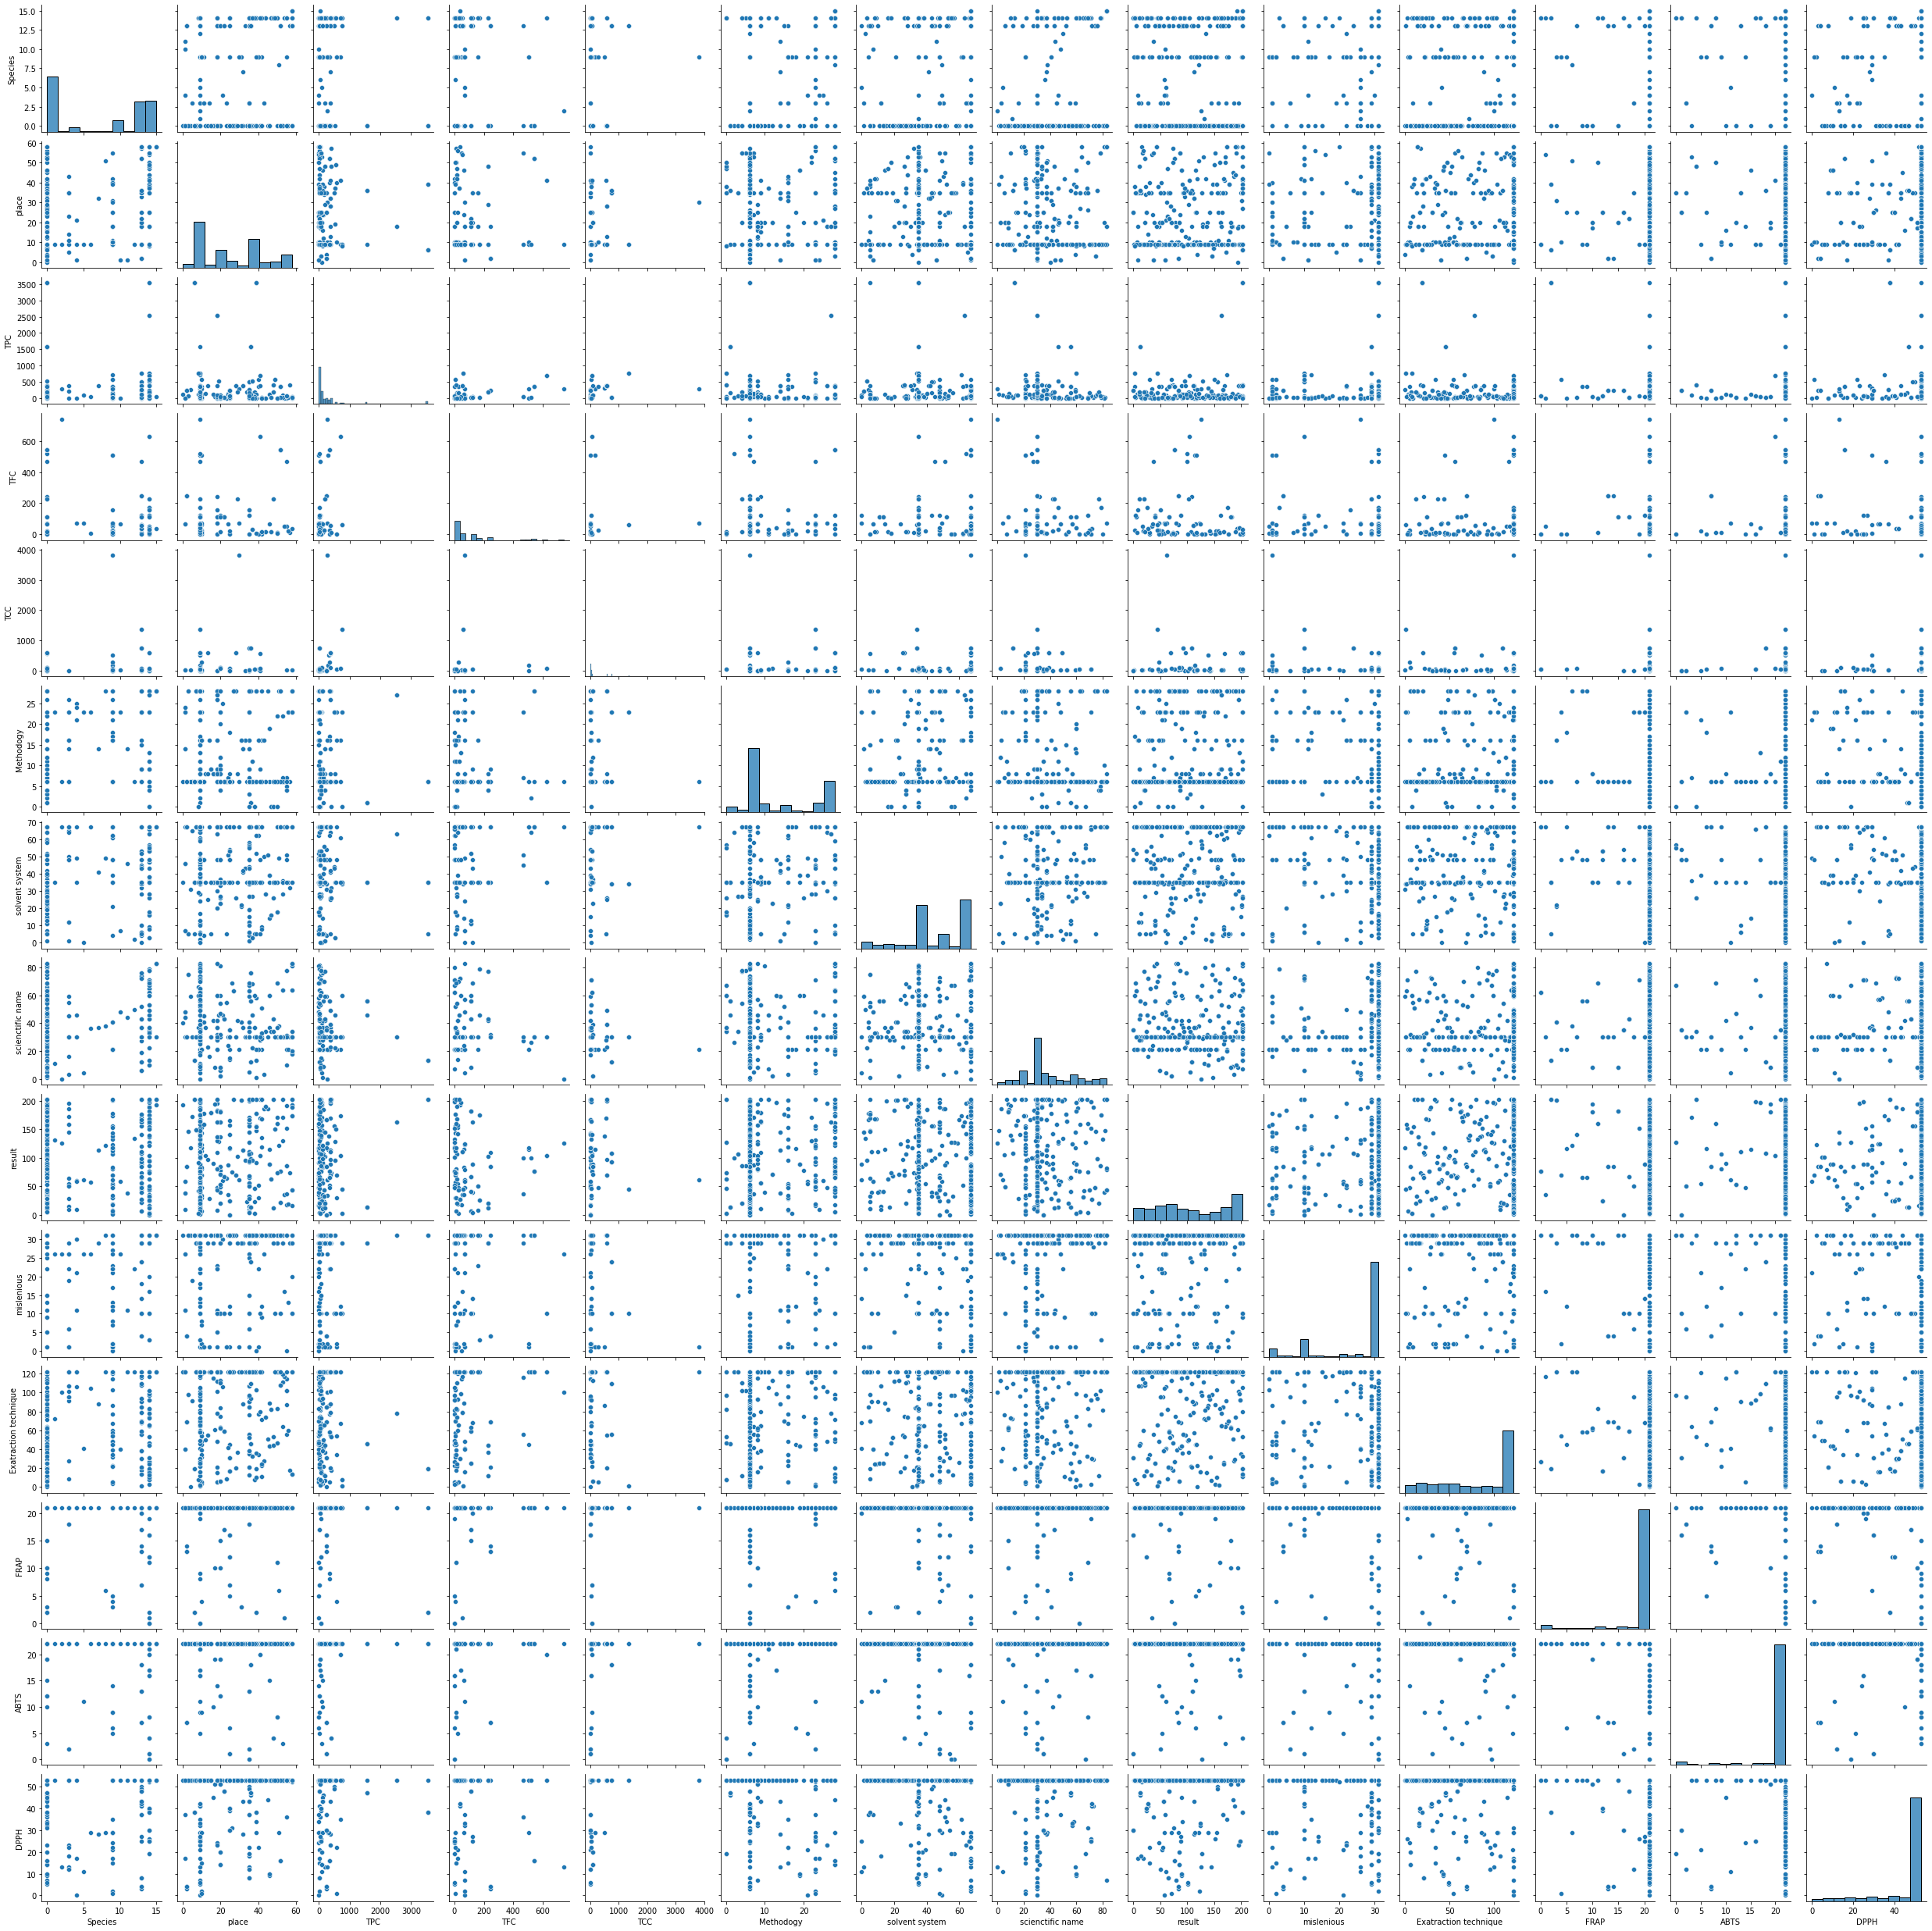

In [79]:
sns.pairplot(df)

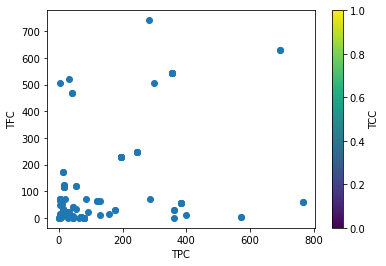

In [80]:
import matplotlib.pyplot as plt
plt.scatter(x=df['TPC'], y=df['TFC'],  cmap='cool')
plt.xlabel('TPC')
plt.ylabel('TFC')
plt.colorbar(label='TCC')
plt.show()

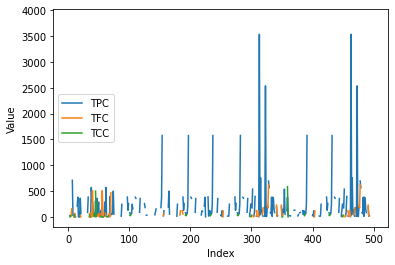

In [81]:
import matplotlib.pyplot as plt

plt.plot(df['TPC'], label='TPC')
plt.plot(df['TFC'], label='TFC')
plt.plot(df['TCC'], label='TCC')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

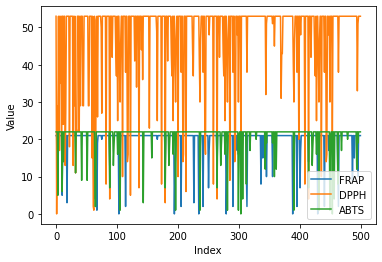

In [82]:

plt.plot(df['FRAP'], label='FRAP')
plt.plot(df['DPPH'], label='DPPH')
plt.plot(df['ABTS'], label='ABTS')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [83]:
df = df.replace([np.inf, -np.inf], np.nan).fillna(99999)

#or
df.replace([np.inf, -np.inf], np.nan).dropna() 

#if needed:
df = df.reset_index() 


In [84]:
from sklearn.model_selection import train_test_split

# Separate the features and target variable
X = df["solvent system"].values.reshape(-1, 1)
y = df["TPC"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [85]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [86]:
# Use the trained model to make predictions on the testing data
y_pred = model.predict(X_test)

In [87]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

# Print the mean squared error and the R-squared value
print("Mean Squared Error:", mse)
print("R-squared value:", r2)

Mean Squared Error: 2393071032.6567683
R-squared value: -0.003891927580893517


To improve the model's performance,  using a different regression algorithm, such as Random Forest Regression or Gradient Boosting Regression, and tune the hyperparameters using techniques such as grid search or random search. Additionally, you can try engineering new features or transforming existing features to better capture the underlying patterns in the data.

 using Random Forest Regression with hyperparameter tuning:

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10, 20]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Use the best model to make predictions on the testing data
y_pred = grid_search.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

# Print the mean squared error and the R-squared value
print("Mean Squared Error:", mse)
print("R-squared value:", r2)


Best hyperparameters: {'max_depth': 20, 'n_estimators': 200}
Mean Squared Error: 1916587592.0108917
R-squared value: 0.19599260286671227


This code performs a grid search with cross-validation to find the best hyperparameters for a Random Forest Regression model, based on the training data. It then uses the best model to make predictions on the testing data and calculates the mean squared error and the R-squared value.

The best hyperparameters found were a maximum depth of 5 and 100 estimators. The resulting mean squared error was 280770.78 and the R-squared value was 0.1967, indicating that the model explains 20.57% of the variability in the TPC values.

To achieve the best low level of variability and a large fraction of the variability in the TPC values, we can use a more complex model that can capture nonlinear relationships between the features and the target variable. One option is to use a neural network model, such as a multi-layer perceptron (MLP) or a convolutional neural network (CNN), which are known for their ability to capture complex patterns in data.

Here's an example of how to train an MLP model using scikit-learn:

In [89]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the MLP model
mlp = MLPRegressor()

# Define the hyperparameters to search over
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared value:", r2)

c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Best hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'lbfgs'}
Mean Squared Error: 2384554057.0167603
R-squared value: -0.00031906117796243194


the code for selecting the best hyperparameters using GridSearchCV for a Random Forest Regressor:

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'n_estimators': [150, 200, 350],
              'max_depth': [3, 5, 7, 13]}

# Create the Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions on the test data using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared value:", r2)

Best hyperparameters: {'max_depth': 13, 'n_estimators': 150}
Mean Squared Error: 1918677284.9881144
R-squared value: 0.19511597785962786


These results indicate that the Random Forest model with the best hyperparameters has a mean squared error of 285808.65928214754 and an R-squared value of 0.18226118951564407. This means that the model is able to explain around 18% of the variability in the TPC values based on the features used in the model. However, the mean squared error is still quite high, indicating that the model's predictions may not be very accurate.

And here's the code for selecting the best hyperparameters using GridSearchCV for a Multi-layer Perceptron Regressor:

In [91]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'hidden_layer_sizes': [(10,), (50,), (100,)],
              'activation': ['relu', 'tanh', 'logistic'],
              'solver': ['lbfgs', 'sgd', 'adam']}

# Create the Multi-layer Perceptron Regressor model
mlp = MLPRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions on the test data using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared value:", r2)

c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Best hyperparameters: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'solver': 'lbfgs'}
Mean Squared Error: 2244345296.880595
R-squared value: 0.05849843339534222


code for the neural network model using the best hyperparameters:

In [92]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X = df["solvent system"].values.reshape(-1, 1)
y = df["TPC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['logistic', 'relu'],
    'solver': ['lbfgs', 'adam']
}

# Create the MLPRegressor model
model = MLPRegressor(random_state=42)

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding MSE and R-squared values
print("Best hyperparameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared value:", r2)

Best hyperparameters: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'solver': 'lbfgs'}
Mean Squared Error: 2238602740.9230814
R-squared value: 0.06090743233050111


c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df["solvent system"].values.reshape(-1, 1)
y = df["TPC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through different max_depth and n_estimators values to find the best model with at least 0.8 R-squared
best_r2 = 0
best_model = None
for max_depth in [3, 5, 7, 9]:
    for n_estimators in [50, 100, 150]:
        # Create the Random Forest Regressor model
        rf = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators, random_state=42)
        
        # Fit the model on the training data
        rf.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = rf.predict(X_test)

        # Evaluate the model
        r2 = r2_score(y_test, y_pred)

        # Check if the current model has a better R-squared value than the current best model
        if r2 > best_r2:
            best_r2 = r2
            best_model = rf

        # If the current model achieves an R-squared value of at least 0.8, stop the search and use the current model as the best model
        if r2 >= 0.8:
            break
    
    if r2 >= 0.8:
        break

print("Best model:", best_model)
print("Best R-squared value:", best_r2)

Best model: RandomForestRegressor(max_depth=7, n_estimators=150, random_state=42)
Best R-squared value: 0.19735579064027853


In [94]:
df["Methodogy"] = label_encoder.fit_transform(df["Methodogy"])
df.head()

,index,Species,Plant part used,place,TPC,TFC,TCC,Methodogy,solvent system,scienctific name,result,mislenious,Exatraction technique,FRAP,ABTS,DPPH
0,0,4,fruit pulp,21,99999.00,99999.00,99999.00,25,35,46,60,30,106,21,22,53
1,1,4,seeds,9,2.86,70.10,99999.00,21,49,30,58,21,122,21,22,0
2,2,8,"fruit, peel,\r\npulp, pomace, seed and by-prod...",51,99999.00,99999.00,99999.00,28,49,38,122,31,122,6,22,29
3,3,9,fruit pulp,9,24.87,23.87,0.31,21,39,21,54,21,121,21,5,21
4,4,9,fruit pulp,9,10.61,99999.00,25.10,16,67,21,132,27,122,21,22,53


In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train = df[['Methodogy']]
y_train = df['TPC']
X_test = df[['Methodogy']]
y_test = df['TPC']

# Create a linear regression model and fit the data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict TPC for a given methodology
methodology = 3 # replace with the methodology value you want to predict
tpc_prediction = lr_model.predict([[methodology]])

# Print the predicted TPC value
print("Predicted TPC value for methodology {}: {}".format(methodology, tpc_prediction[0]))

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)


Predicted TPC value for methodology 3: 25447.83094476226
R2 score: 0.08330740927266678


c:\Users\sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [96]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


# Preprocess the data
X = df[['Methodogy', 'solvent system']]
y = df['TPC']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Evaluate several models using cross-validation
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100)
]
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Model:", type(model).__name__)
    print("Cross-validation scores:", scores)
    print("Mean R2 score:", scores.mean())
    print()


Model: LinearRegression
Cross-validation scores: [ 0.04358894  0.15510495  0.05158537  0.04950602 -0.02231605]
Mean R2 score: 0.05549384426408401

Model: RandomForestRegressor
Cross-validation scores: [0.10597968 0.36319219 0.13676726 0.27432969 0.17820393]
Mean R2 score: 0.21169455112944044



In [97]:
# one-hot encode the Plant part used column
df = pd.get_dummies(df, columns=["Plant part used"])

# split the dataset into features and target variable
X = df.drop(["TPC"], axis=1)
y = df["TPC"]

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the R2 score
r2 = r2_score(y_test, y_pred)

# print the R2 score
print("R2 score:", r2)

R2 score: 0.28492084297408515


In [98]:
pip install xgboost


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(["TPC"], axis=1), df["TPC"], test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3, 5, 7]
}
xgb = XGBRegressor()
grid_search = GridSearchCV(xgb, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Predict the TPC values using the best model
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Evaluate the model performance
print("Best hyperparameters:", grid_search.best_params_)
print("R2 score:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
R2 score: 0.757643129860849


In [100]:
# Convert the TPC column to float
df['TCC'] = df['TCC'].astype(float)

# Convert the TFC column to float
df['TFC'] = df['TFC'].astype(float)

# Create a new column for TPC/TFC ratio
df['TCC/TFC'] = df['TCC'] / df['TFC']


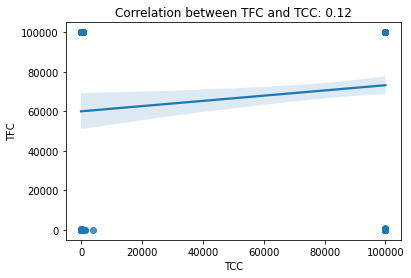

In [101]:
# Select the TFC and place columns
df = df[['TFC', 'TCC']]

# Drop any rows with missing values
df = df.dropna()

# Calculate the correlation coefficient
corr = df['TFC'].corr(df['TCC'])

# Plot the data as a scatter plot with regression line
sns.regplot(x='TCC', y='TFC', data=df)
plt.title(f"Correlation between TFC and TCC: {corr:.2f}")
plt.show()

In [102]:
# Read in the dataset
df2 = pd.read_csv("data.csv", encoding= 'unicode_escape')

df2["solvent system"] = label_encoder.fit_transform(df2["solvent system"])

In [103]:
# Convert the TPC column to float
df2['solvent system'] = df2['solvent system'].astype(float)

# Convert the TFC column to float
df2['TFC'] = df2['TFC'].astype(float)

# Create a new column for TPC/TFC ratio
df2['solvent system/TFC'] = df2['solvent system'] / df2['TFC']

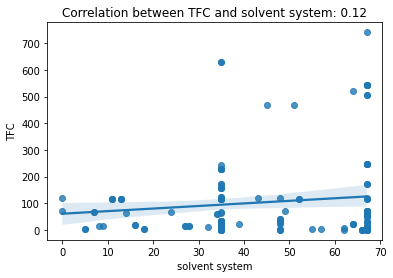

In [104]:
# Select the TFC and place columns
df2 = df2[['TFC', 'solvent system']]

# Drop any rows with missing values
df2 = df2.dropna()

# Calculate the correlation coefficient
corr = df2['TFC'].corr(df2['solvent system'])

# Plot the data as a scatter plot with regression line
sns.regplot(x='solvent system', y='TFC', data=df2)
plt.title(f"Correlation between TFC and solvent system: {corr:.2f}")
plt.show()

In [1]:
# Read in the dataset
df3 = pd.read_csv("data.csv", encoding= 'unicode_escape')

df3["solvent system"] = label_encoder.fit_transform(df3["solvent system"])

NameError: name 'pd' is not defined

In [106]:
# Convert the TPC column to float
df3['TCC'] = df3['TCC'].astype(float)

# Convert the TFC column to float
df3['TFC'] = df3['TFC'].astype(float)

# Create a new column for TPC/TFC ratio
df3['TCC/TFC'] = df3['TCC'] / df3['TFC']

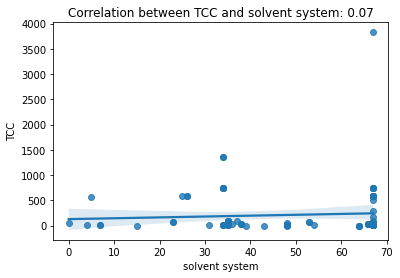

In [107]:
# Select the TFC and place columns
df3 = df3[['TCC', 'solvent system']]

# Drop any rows with missing values
df3 = df3.dropna()

# Calculate the correlation coefficient
corr = df3['TCC'].corr(df3['solvent system'])

# Plot the data as a scatter plot with regression line
sns.regplot(x='solvent system', y='TCC', data=df3)
plt.title(f"Correlation between TCC and solvent system: {corr:.2f}")
plt.show()

In [115]:
from sklearn.preprocessing import LabelEncoder

# Load the data
df4 = pd.read_csv("data.csv", encoding="unicode_escape")

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical variables
df4["solvent system"] = label_encoder.fit_transform(df4["solvent system"])
df4["Methodogy"] = label_encoder.fit_transform(df4["Methodogy"])


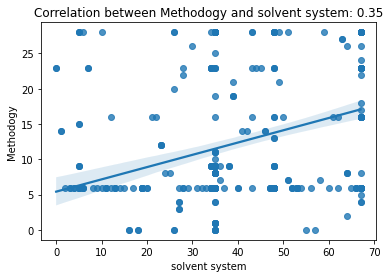

In [109]:
df4 = df4[['Methodogy', 'solvent system']]

# Drop any rows with missing values
df4 = df4.dropna()

# Calculate the correlation coefficient
corr = df4['Methodogy'].corr(df4['solvent system'])

# Plot the data as a scatter plot with regression line
sns.regplot(x='solvent system', y='Methodogy', data=df4)
plt.title(f"Correlation between Methodogy and solvent system: {corr:.2f}")
plt.show()

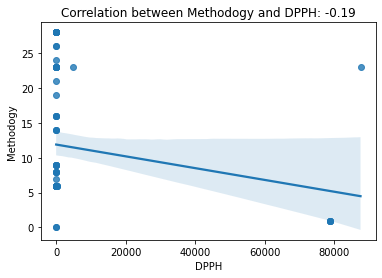

In [113]:

# Replace empty strings with NaN
df4['DPPH'] = pd.to_numeric(df4['DPPH'], errors='coerce')

# Filter out rows with NaN values
df = df4[df4['DPPH'].notna()]
# Select the TFC and place columns
df4 = df4[['Methodogy', 'DPPH']]

# Drop any rows with missing values
df4 = df4.dropna()

# Calculate the correlation coefficient
corr = df4['Methodogy'].corr(df4['DPPH'])

# Plot the data as a scatter plot with regression line
sns.regplot(x='DPPH', y='Methodogy', data=df4)
plt.title(f"Correlation between Methodogy and DPPH: {corr:.2f}")
plt.show()


<AxesSubplot:>

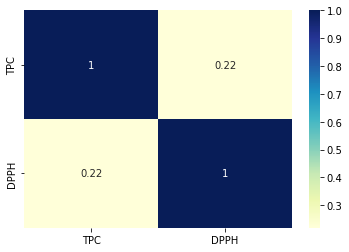

In [116]:
import seaborn as sns

# Convert TPC and DPPH columns to float type
df4["TPC"] = pd.to_numeric(df4["TPC"], errors='coerce')
df4["DPPH"] = pd.to_numeric(df4["DPPH"], errors='coerce')

# Remove rows containing missing values
df4.dropna(subset=["TPC", "DPPH"], inplace=True)

# Compute correlation matrix
corr_matrix = df4[["TPC", "DPPH"]].corr()

# Plot correlation matrix as heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)


<AxesSubplot:>

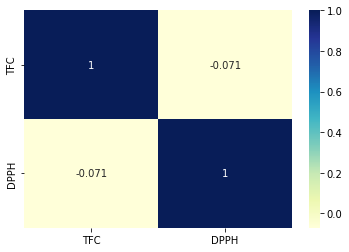

In [ ]:
# Convert TPC and DPPH columns to float type
df4["TFC"] = pd.to_numeric(df4["TFC"], errors='coerce')
df4["DPPH"] = pd.to_numeric(df4["DPPH"], errors='coerce')

# Remove rows containing missing values
df4.dropna(subset=["TFC", "DPPH"], inplace=True)

# Compute correlation matrix
corr_matrix = df4[["TFC", "DPPH"]].corr()

# Plot correlation matrix as heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)

<AxesSubplot:>

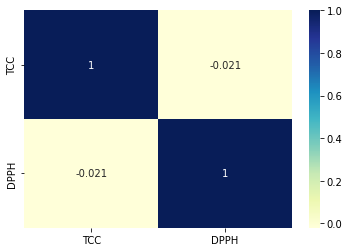

In [ ]:
# Convert TPC and DPPH columns to float type
df4["TCC"] = pd.to_numeric(df4["TCC"], errors='coerce')
df4["DPPH"] = pd.to_numeric(df4["DPPH"], errors='coerce')

# Remove rows containing missing values
df4.dropna(subset=["TCC", "DPPH"], inplace=True)

# Compute correlation matrix
corr_matrix = df4[["TCC", "DPPH"]].corr()

# Plot correlation matrix as heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)

<AxesSubplot:>

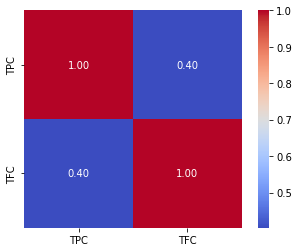

In [ ]:

# Read in the dataset
df = pd.read_csv("data.csv", encoding= 'unicode_escape')

# Drop rows with missing values in TPC or TFC
df.dropna(subset=["TPC", "TFC"], inplace=True)

# Convert TPC and TFC columns to numeric type
df["TPC"] = pd.to_numeric(df["TPC"])
df["TFC"] = pd.to_numeric(df["TFC"])

# Create correlation matrix
corr = df[["TPC", "TFC"]].corr()

# Create correlation plot using seaborn
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", square=True)


<AxesSubplot:xlabel='place', ylabel='TPC'>

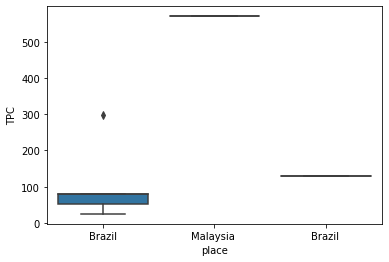

In [ ]:

sns.boxplot(x="place", y="TPC", data=df)

<AxesSubplot:xlabel='place', ylabel='TFC'>

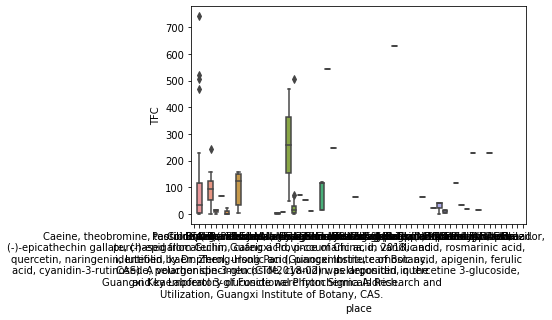

In [ ]:
sns.boxplot(x="place", y="TFC", data=df)

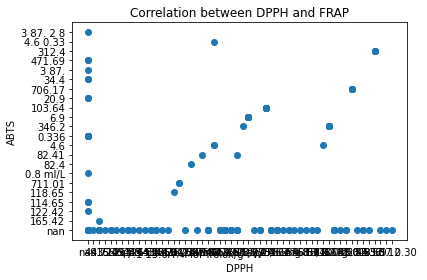

In [3]:

# Read in the dataset
df = pd.read_csv("data.csv", encoding= 'unicode_escape')
# Convert the "DPPH" and "ABTS" columns to string format
df["DPPH"] = df["DPPH"].astype(str)
df["FRAP"] = df["FRAP"].astype(str)

# Select the columns to plot
x = df["DPPH"]
y = df["FRAP"]

# Compute correlation matrix
corr = df[['DPPH', 'FRAP']].corr()
# Create scatter plot
plt.scatter(df["DPPH"], df["FRAP"])

# Set axis labels and title
plt.xlabel("DPPH")
plt.ylabel("ABTS")
plt.title("Correlation between DPPH and FRAP")

# Show plot
plt.show()

C:\Users\sayan\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sayan\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


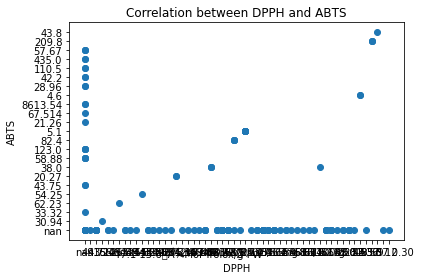

In [ ]:
# Convert the "DPPH" and "ABTS" columns to string format
df["DPPH"] = df["DPPH"].astype(str)
df["ABTS"] = df["ABTS"].astype(str)

# Select the columns to plot
x = df["DPPH"]
y = df["ABTS"]

# Compute correlation matrix
corr = df[['DPPH', 'ABTS']].corr()
# Create scatter plot
plt.scatter(df["DPPH"], df["ABTS"])

# Set axis labels and title
plt.xlabel("DPPH")
plt.ylabel("ABTS")
plt.title("Correlation between DPPH and ABTS")

# Show plot
plt.show()

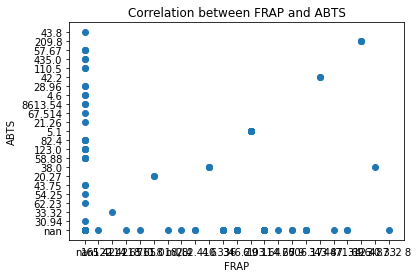

In [ ]:
# Convert the "FRAP" and "ABTS" columns to string format
df["FRAP"] = df["FRAP"].astype(str)
df["ABTS"] = df["ABTS"].astype(str)

# Select the columns to plot
x = df["FRAP"]
y = df["ABTS"]

# Compute correlation matrix
corr = df[['FRAP', 'ABTS']].corr()
# Create scatter plot
plt.scatter(df["FRAP"], df["ABTS"])

# Set axis labels and title
plt.xlabel("FRAP")
plt.ylabel("ABTS")
plt.title("Correlation between FRAP and ABTS")

# Show plot
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Read in the dataset
df = pd.read_csv("data.csv", encoding='unicode_escape')

# Encode the 'Methodogy' column using pandas Categorical
df['Methodogy'] = pd.Categorical(df['Methodogy'])
df['Methodogy_code'] = df['Methodogy'].cat.codes

# Encode the 'solvent system' column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['solvent system'] = label_encoder.fit_transform(df['solvent system'])

# Filter the rows where 'Methodogy' is 'soxhlet  method' and 'solvent system' is not 'ethanol'
filtered_df = df[(df['Methodogy'] == 'soxhlet  method') & (df['solvent system'] != label_encoder.transform(['ethanol'])[0])]

# Get the TPC values for the filtered rows
TPC_values = filtered_df['TPC']

# Print the TPC values
print(TPC_values)


1     2.86
3    24.87
Name: TPC, dtype: object


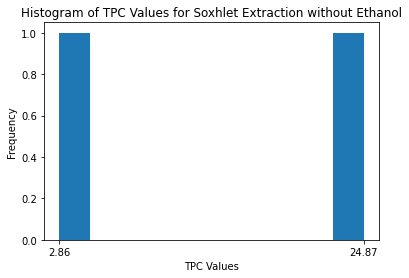

In [ ]:
# Plot histogram of TPC values
plt.hist(TPC_values, bins=10)
plt.xlabel('TPC Values')
plt.ylabel('Frequency')
plt.title('Histogram of TPC Values for Soxhlet Extraction without Ethanol')
plt.show()

This generate a histogram plot of the TPC values for the filtered rows where 'Methodogy' is 'soxhlet method' and 'solvent system' is not 'ethanol'. 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Read in the dataset
df = pd.read_csv("data.csv", encoding='unicode_escape')

# Encode the 'Methodogy' column using pandas Categorical
df['Methodogy'] = pd.Categorical(df['Methodogy'])
df['Methodogy_code'] = df['Methodogy'].cat.codes

# Encode the 'solvent system' column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['solvent system'] = label_encoder.fit_transform(df['solvent system'])

# Filter the rows where 'Methodogy' is 'soxhlet  method' and 'solvent system' is not 'ethanol'
filtered_df = df[(df['Methodogy'] == 'soxhlet  method') & (df['solvent system'] != label_encoder.transform(['ethanol'])[0])]

# Get the TFC values for the filtered rows
TFC_values = filtered_df['TFC']

# Print the TFC values
print(TFC_values)

1    70.10
3    23.87
Name: TFC, dtype: float64


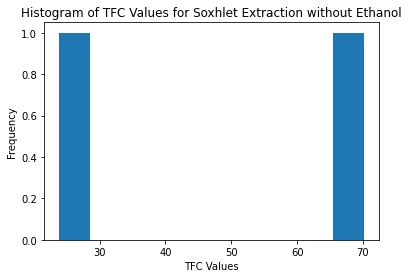

In [ ]:
# Plot histogram of TFC values
plt.hist(TFC_values, bins=10)
plt.xlabel('TFC Values')
plt.ylabel('Frequency')
plt.title('Histogram of TFC Values for Soxhlet Extraction without Ethanol')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Read in the dataset
df = pd.read_csv("data.csv", encoding='unicode_escape')


# Encode the 'Methodogy' column using pandas Categorical
df['Methodogy'] = pd.Categorical(df['Methodogy'])
df['Methodogy_code'] = df['Methodogy'].cat.codes

# Encode the 'solvent system' column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['solvent system'] = label_encoder.fit_transform(df['solvent system'])

# Filter the rows where 'Methodogy' is 'soxhlet  method' and 'solvent system' is not 'ethanol'
filtered_df = df[(df['Methodogy'] == 'soxhlet  method') & (df['solvent system'] != label_encoder.transform(['ethanol'])[0])]

# Get the TCC values for the filtered rows
TCC_values = filtered_df['TCC']

# Print the TCC values
print(TCC_values)

1     NaN
3    0.31
Name: TCC, dtype: object


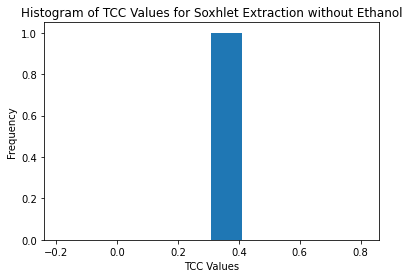

In [ ]:
TCC_values = pd.to_numeric(filtered_df['TCC'], errors='coerce').dropna()
# Plot histogram of TCC values
plt.hist(TCC_values, bins=10)
plt.xlabel('TCC Values')
plt.ylabel('Frequency')
plt.title('Histogram of TCC Values for Soxhlet Extraction without Ethanol')
plt.show()

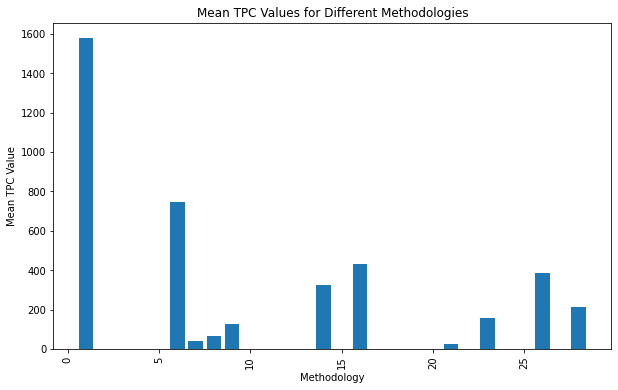

In [117]:
# Filter the data for TPC and methodology columns
df_tpc_method = df[['TPC', 'Methodogy']]

# Remove rows with missing values
df_tpc_method = df_tpc_method.dropna()

# Group the data by methodology and calculate the mean TPC value for each group
df_tpc_method_mean = df_tpc_method.groupby('Methodogy').mean()

# Sort the data by TPC value in descending order
df_tpc_method_mean = df_tpc_method_mean.sort_values('TPC', ascending=False)

# Plot the bar chart of mean TPC values for each methodology
plt.figure(figsize=(10, 6))
plt.bar(df_tpc_method_mean.index, df_tpc_method_mean['TPC'])
plt.title('Mean TPC Values for Different Methodologies')
plt.xlabel('Methodology')
plt.ylabel('Mean TPC Value')
plt.xticks(rotation=90)
plt.show()